In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [77]:
# Importing the dataset

house_df = pd.read_csv('/Users/sruthi/Documents/Predictive Analytics/Week 4/week 4 - Nashville_housing_data.csv') 
house_df

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,56602,176 01 0 003.00,SINGLE FAMILY,4617 ROCKLAND TRL,NaN,ANTIOCH,10/13/2016,20161019-0110290,No,No,...,105000,1758.00000,CRAWL,1996,BRICK/FRAME,C,3.0,2.0,0.0,Over
22647,56605,176 05 0 070.00,SINGLE FAMILY,5004 SUNSHINE DR,NaN,ANTIOCH,10/26/2016,20161102-0115842,No,No,...,142400,2421.00000,SLAB,1996,BRICK/FRAME,C,3.0,3.0,0.0,Over
22648,56607,176 09 0 003.00,SINGLE FAMILY,4964 HICKORY WOODS E,NaN,ANTIOCH,10/28/2016,20161031-0114817,No,No,...,159300,3117.00000,SLAB,1995,BRICK/FRAME,C,3.0,3.0,0.0,Over
22649,56614,082 05 0 040.00,SINGLE FAMILY,1625 5TH AVE N,NaN,NASHVILLE,10/28/2016,20161102-0115988,No,No,...,204100,1637.00000,CRAWL,2004,FRAME,B,3.0,2.0,1.0,Over


In [78]:
# Shape of the dataset

house_df.shape

(22651, 26)

## Data cleaning

In [79]:
# Checking for null values

house_df.isnull().sum()

Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     22651
Property City                            2
Sale Date                                0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Finished Area                            1
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 3
Full Bath  

In [80]:
# Checking for bad values

for col in house_df:
    print(col,": ", house_df[col].dtypes) 
    print(house_df[col].unique())

Unnamed: 0 :  int64
[    1     2     3 ... 56607 56614 56615]
Parcel ID :  object
['105 11 0 080.00' '118 03 0 130.00' '119 01 0 479.00' ...
 '176 05 0 070.00' '176 09 0 003.00' '082 05 0 058.00']
Land Use :  object
['SINGLE FAMILY' 'DUPLEX' 'RESIDENTIAL COMBO/MISC' 'QUADPLEX']
Property Address :  object
['1802  STEWART PL' '2761  ROSEDALE PL' '224  PEACHTREE ST' ...
 '4964 HICKORY WOODS  E' '1625 5TH  AVE N' '1614 5TH  AVE N']
Suite/ Condo   # :  float64
[nan]
Property City :  object
['NASHVILLE' 'ANTIOCH' 'BRENTWOOD' 'MADISON' 'OLD HICKORY' 'HERMITAGE'
 'GOODLETTSVILLE' 'JOELTON' 'WHITES CREEK' 'MOUNT JULIET' nan]
Sale Date :  object
['1/11/2013' '1/18/2013' '1/23/2013' ... '10/18/2016' '10/27/2016'
 '10/4/2016']
Legal Reference :  object
['20130118-0006337' '20130124-0008033' '20130128-0008863' ...
 '20161031-0114817' '20161102-0115988' '20161101-0115366']
Sold As Vacant :  object
['No' 'Yes']
Multiple Parcels Involved in Sale :  object
['No' 'Yes']
City :  object
['NASHVILLE' 'ANTI

In [81]:
# Understanding the stats of the dataset

house_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,22651.0,27889.491192,16598.865706,1.00,13324.5,27712.000000,42330.500,5.661500e+04
Suite/ Condo #,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acreage,22651.0,0.454705,0.611818,0.04,0.2,0.280000,0.460,1.750000e+01
Neighborhood,22651.0,4432.715024,2142.803595,107.00,3130.0,4026.000000,6229.000,9.530000e+03
Land Value,22651.0,70137.969008,102903.504144,900.00,22000.0,30000.000000,60300.000,1.869000e+06
Building Value,22651.0,172240.222286,189642.443141,1400.00,85500.0,118800.000000,188250.000,5.824300e+06
Finished Area,22650.0,1915.377151,1079.094521,450.00,1250.0,1645.824995,2213.375,1.972825e+04
Year Built,22651.0,1961.947684,25.843908,1832.00,1947.0,1959.000000,1977.000,2.017000e+03
Bedrooms,22648.0,3.104910,0.829287,0.00,3.0,3.000000,4.000,1.100000e+01
Full Bath,22650.0,1.887285,0.951220,0.00,1.0,2.000000,2.000,1.000000e+01


In [82]:
# Understanding the types of data in the dataset

house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22651 non-null  int64  
 1   Parcel ID                          22651 non-null  object 
 2   Land Use                           22651 non-null  object 
 3   Property Address                   22649 non-null  object 
 4   Suite/ Condo   #                   0 non-null      float64
 5   Property City                      22649 non-null  object 
 6   Sale Date                          22651 non-null  object 
 7   Legal Reference                    22651 non-null  object 
 8   Sold As Vacant                     22651 non-null  object 
 9   Multiple Parcels Involved in Sale  22651 non-null  object 
 10  City                               22651 non-null  object 
 11  State                              22651 non-null  obj

In [83]:
#Dropping column Suite/ Condo   #

house_df.drop(['Suite/ Condo   #','Unnamed: 0'], axis=1, inplace=True)

In [84]:
#Dropping duplicate rows in the dataset

print("Before removing duplicates: ",len(house_df))
house_df = house_df.drop_duplicates()
print("After removing duplicates: ",len(house_df))



Before removing duplicates:  22651
After removing duplicates:  22610


In [85]:
#Dropping a few columns since it would not be used in the analysis

house_df.drop(['Parcel ID','Property Address','Legal Reference','State'], axis=1, inplace=True)

/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_95188/3631445360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_df.drop(['Parcel ID','Property Address','Legal Reference','State'], axis=1, inplace=True)


In [86]:
# Removing white spaces from the column "Grade"

house_df['Grade'] = house_df['Grade'].str.strip()

/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_95188/1247569068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_df['Grade'] = house_df['Grade'].str.strip()


In [87]:
# Deriving month and year from the column "Sale Date"

house_df['Sale Date'] = pd.to_datetime(house_df['Sale Date'])

house_df['Sale_Year'] = house_df['Sale Date'].dt.year
house_df['Sale_Month'] = house_df['Sale Date'].dt.month

/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_95188/2220679729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_df['Sale Date'] = pd.to_datetime(house_df['Sale Date'])
/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_95188/2220679729.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_df['Sale_Year'] = house_df['Sale Date'].dt.year
/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_95188/2220679729.py:6: SettingWithCopyWarning: 
A value is trying to be set on a 

In [88]:
house_df = house_df.drop(['Sale Date'], axis=1)

## EDA

In [89]:
house_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Acreage,22610.0,0.455064,0.612273,0.04,0.2,0.28,0.46,1.750000e+01
Neighborhood,22610.0,4434.850995,2142.538596,107.00,3130.0,4026.00,6229.00,9.530000e+03
Land Value,22610.0,70219.024149,102978.124736,900.00,22000.0,30000.00,60300.00,1.869000e+06
Building Value,22610.0,172373.908669,189777.108607,1400.00,85600.0,118900.00,188400.00,5.824300e+06
Finished Area,22609.0,1916.165884,1079.704214,450.00,1250.0,1646.00,2214.00,1.972825e+04
Year Built,22610.0,1961.938169,25.844272,1832.00,1947.0,1959.00,1977.00,2.017000e+03
Bedrooms,22607.0,3.105321,0.829546,0.00,3.0,3.00,4.00,1.100000e+01
Full Bath,22609.0,1.887700,0.951585,0.00,1.0,2.00,2.00,1.000000e+01
Half Bath,22502.0,0.270287,0.480272,0.00,0.0,0.00,1.00,3.000000e+00
Sale_Year,22610.0,2014.564264,1.083598,2013.00,2014.0,2015.00,2015.00,2.016000e+03


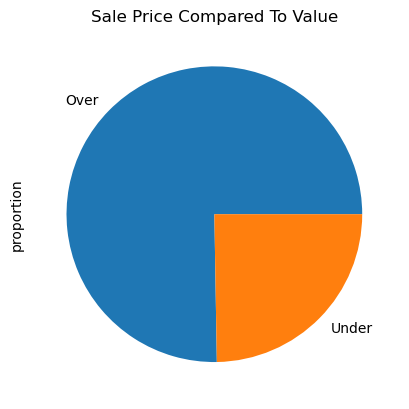

In [90]:
#plot the pie chart of 'Sale Price Compared To Value' categories

house_df['Sale Price Compared To Value'].value_counts(normalize=True).plot.pie()
plt.title("Sale Price Compared To Value")
plt.show()

<Axes: xlabel='Sale_Month', ylabel='count'>

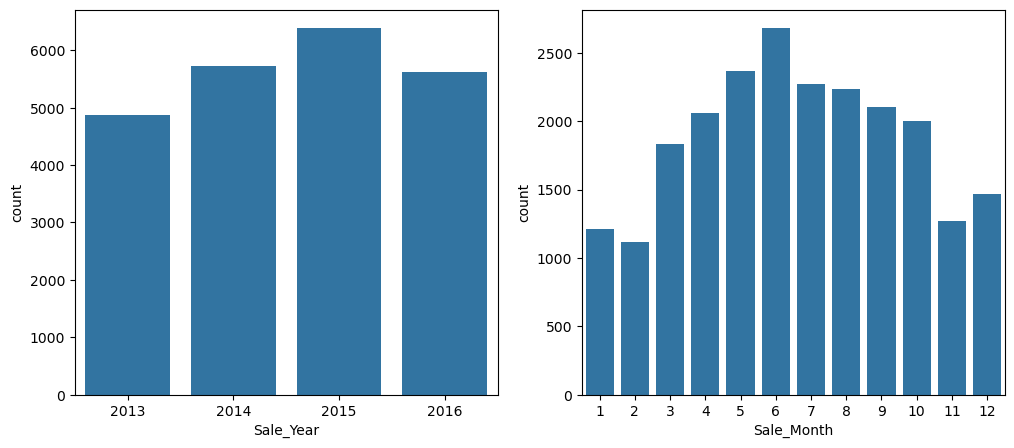

In [91]:
# Checking which year and month had the highest sales

fig, (axis1, axis2) = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x='Sale_Year', data = house_df, ax = axis1)
sns.countplot(x='Sale_Month', data = house_df, ax = axis2)

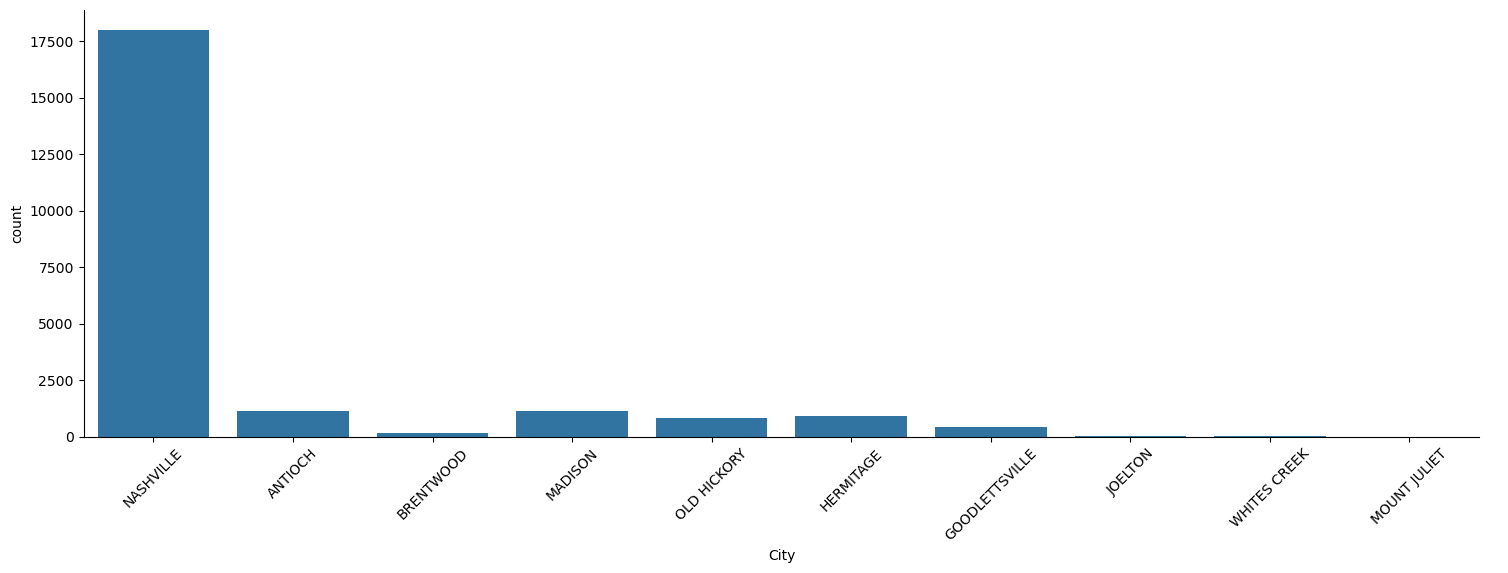

In [92]:
# Sales in cities

sales_cities= sns.catplot(x="City", kind="count", height=5, aspect=3, data=house_df)
sales_cities.set_xticklabels(rotation=45)

In [93]:
# Two columns are similar hence we will to remove one 

house_df.loc[~(house_df['Property City'] == house_df['City'])]

,Land Use,Property City,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Neighborhood,Land Value,Building Value,...,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value,Sale_Year,Sale_Month
13063,SINGLE FAMILY,BRENTWOOD,No,No,NASHVILLE,0.61,URBAN SERVICES DISTRICT,4026,47000,234300,...,FULL BSMT,1963,BRICK,C,3.0,1.0,1.0,Over,2015,6
17529,SINGLE FAMILY,NaN,No,No,NASHVILLE,0.32,URBAN SERVICES DISTRICT,3227,220000,501100,...,CRAWL,2016,BRICK/FRAME,B,5.0,4.0,1.0,Under,2016,2
17696,SINGLE FAMILY,NaN,No,No,NASHVILLE,0.16,URBAN SERVICES DISTRICT,3627,25000,283100,...,CRAWL,2016,FRAME,B,4.0,2.0,1.0,Under,2016,2


In [94]:
# Dropping the column since we will not need it

house_df.drop("Property City", axis=1, inplace=True)

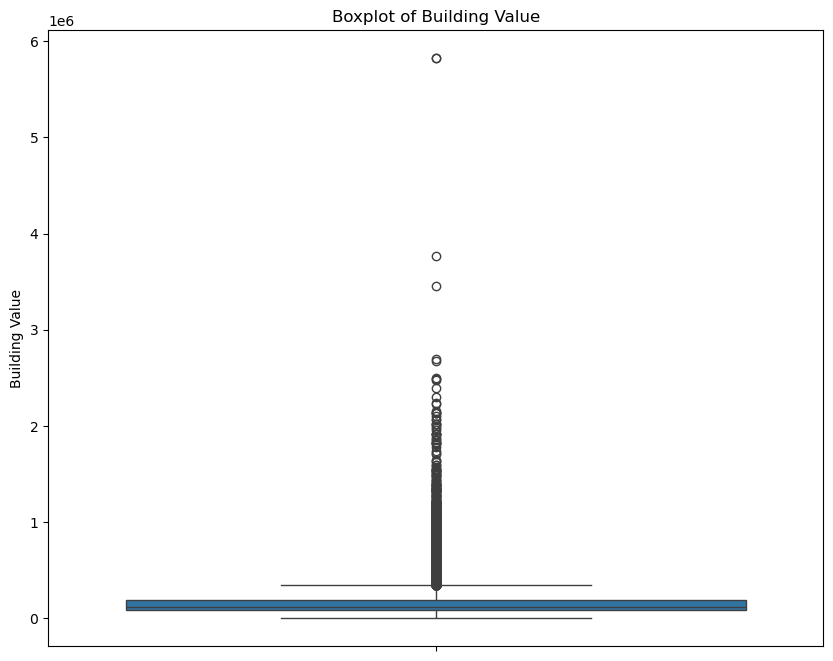

In [95]:
# Checking outliers of building value

plt.figure(figsize=(10,8))

plt.title('Boxplot of Building Value')
sns.boxplot(y = house_df['Building Value'])

plt.show()

In [96]:
# Building value has many outliers hence we will replace with median

house_df['Building Value'] = house_df['Building Value'].fillna(house_df['Building Value'].median())

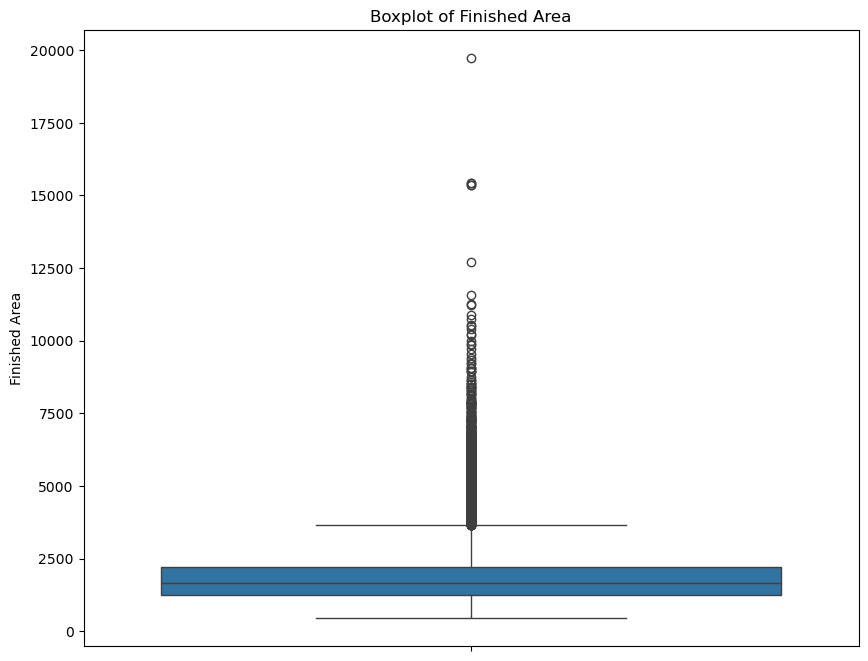

In [97]:
# Checking outliers in "finished area"

plt.figure(figsize=(10,8))

plt.title('Boxplot of Finished Area')
sns.boxplot(y = house_df['Finished Area'])

plt.show()

In [98]:
# finished area has many outliers hence we will replace with median

house_df['Finished Area'] = house_df['Finished Area'].fillna(house_df['Finished Area'].median())

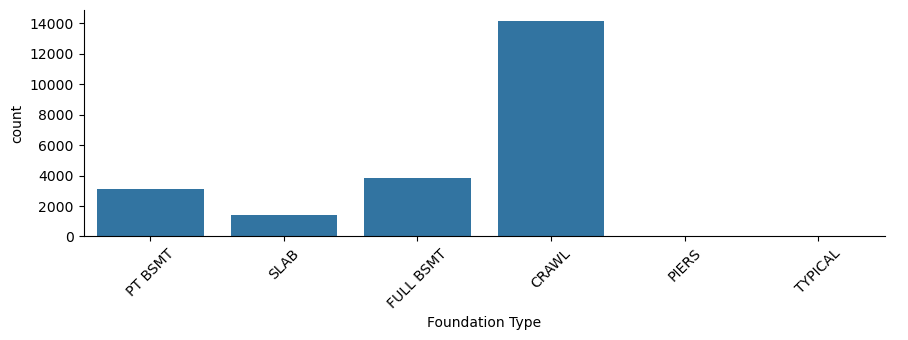

In [99]:
# Foundation type has null values, replacing with mode since it is a categorical variable

foundation_mode= sns.catplot(x="Foundation Type", kind="count", height=3, aspect=3, data=house_df)
foundation_mode.set_xticklabels(rotation=45)

In [100]:
house_df['Foundation Type'] = house_df['Foundation Type'].fillna(house_df['Foundation Type'].mode()[0])

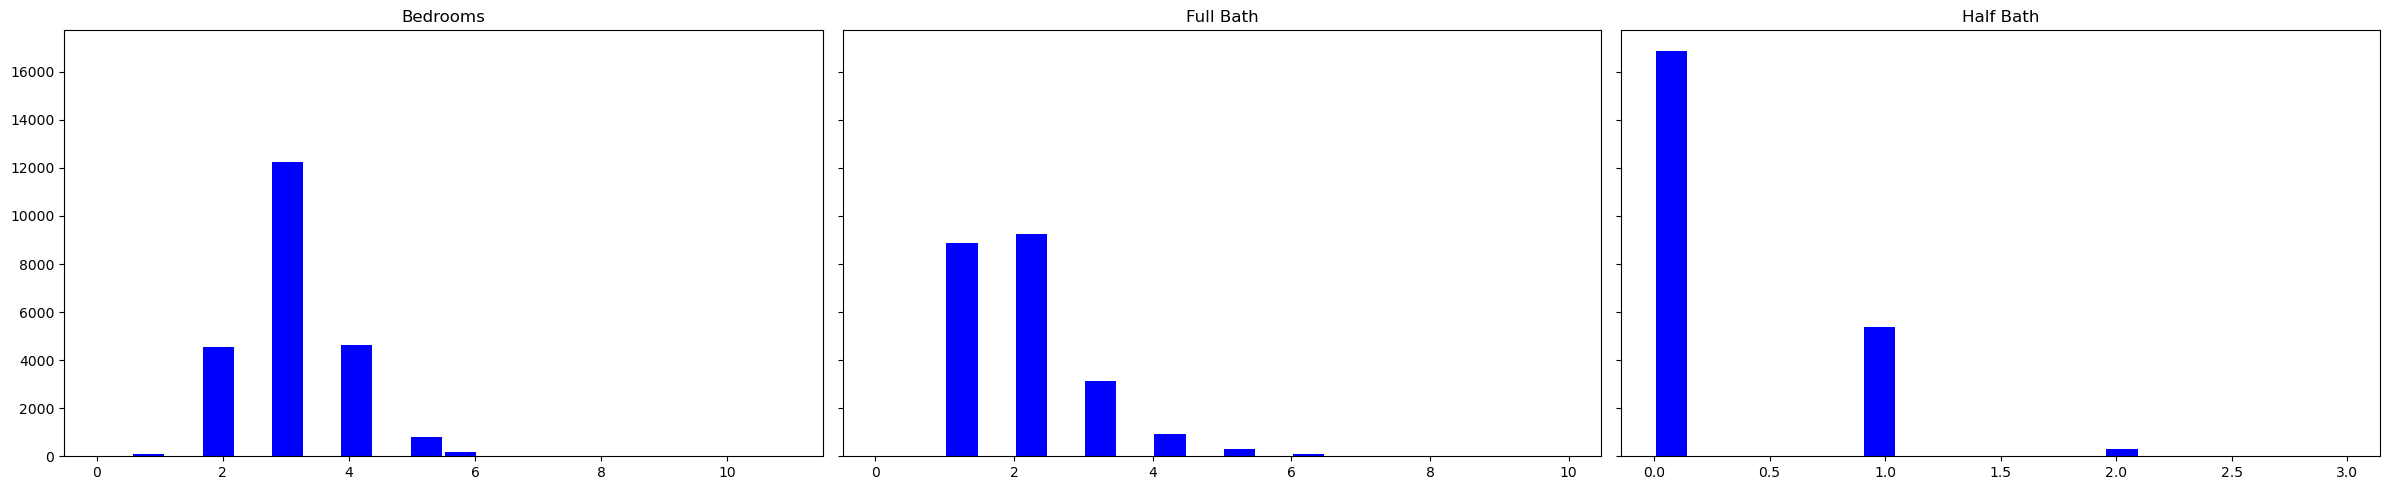

In [111]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(24, 5), sharey=True)

house_df.hist(column='Bedrooms', bins=20, grid=False, ax=axes[0], color='blue', zorder=2, rwidth=0.9)
axes[0].set_title('Bedrooms')

house_df.hist(column='Full Bath', bins=20, grid=False, ax=axes[1], color='blue', zorder=2, rwidth=0.9)
axes[1].set_title('Full Bath')

house_df.hist(column='Half Bath', bins=20, grid=False, ax=axes[2], color='blue', zorder=2, rwidth=0.9)
axes[2].set_title('Half Bath')

plt.tight_layout()
plt.show()


In [102]:
# Replacing NA with mode

house_df['Bedrooms'] = house_df['Bedrooms'].fillna(house_df['Bedrooms'].mode()[0])
house_df['Full Bath'] = house_df['Full Bath'].fillna(house_df['Full Bath'].mode()[0])
house_df['Half Bath'] = house_df['Half Bath'].fillna(house_df['Half Bath'].mode()[0])

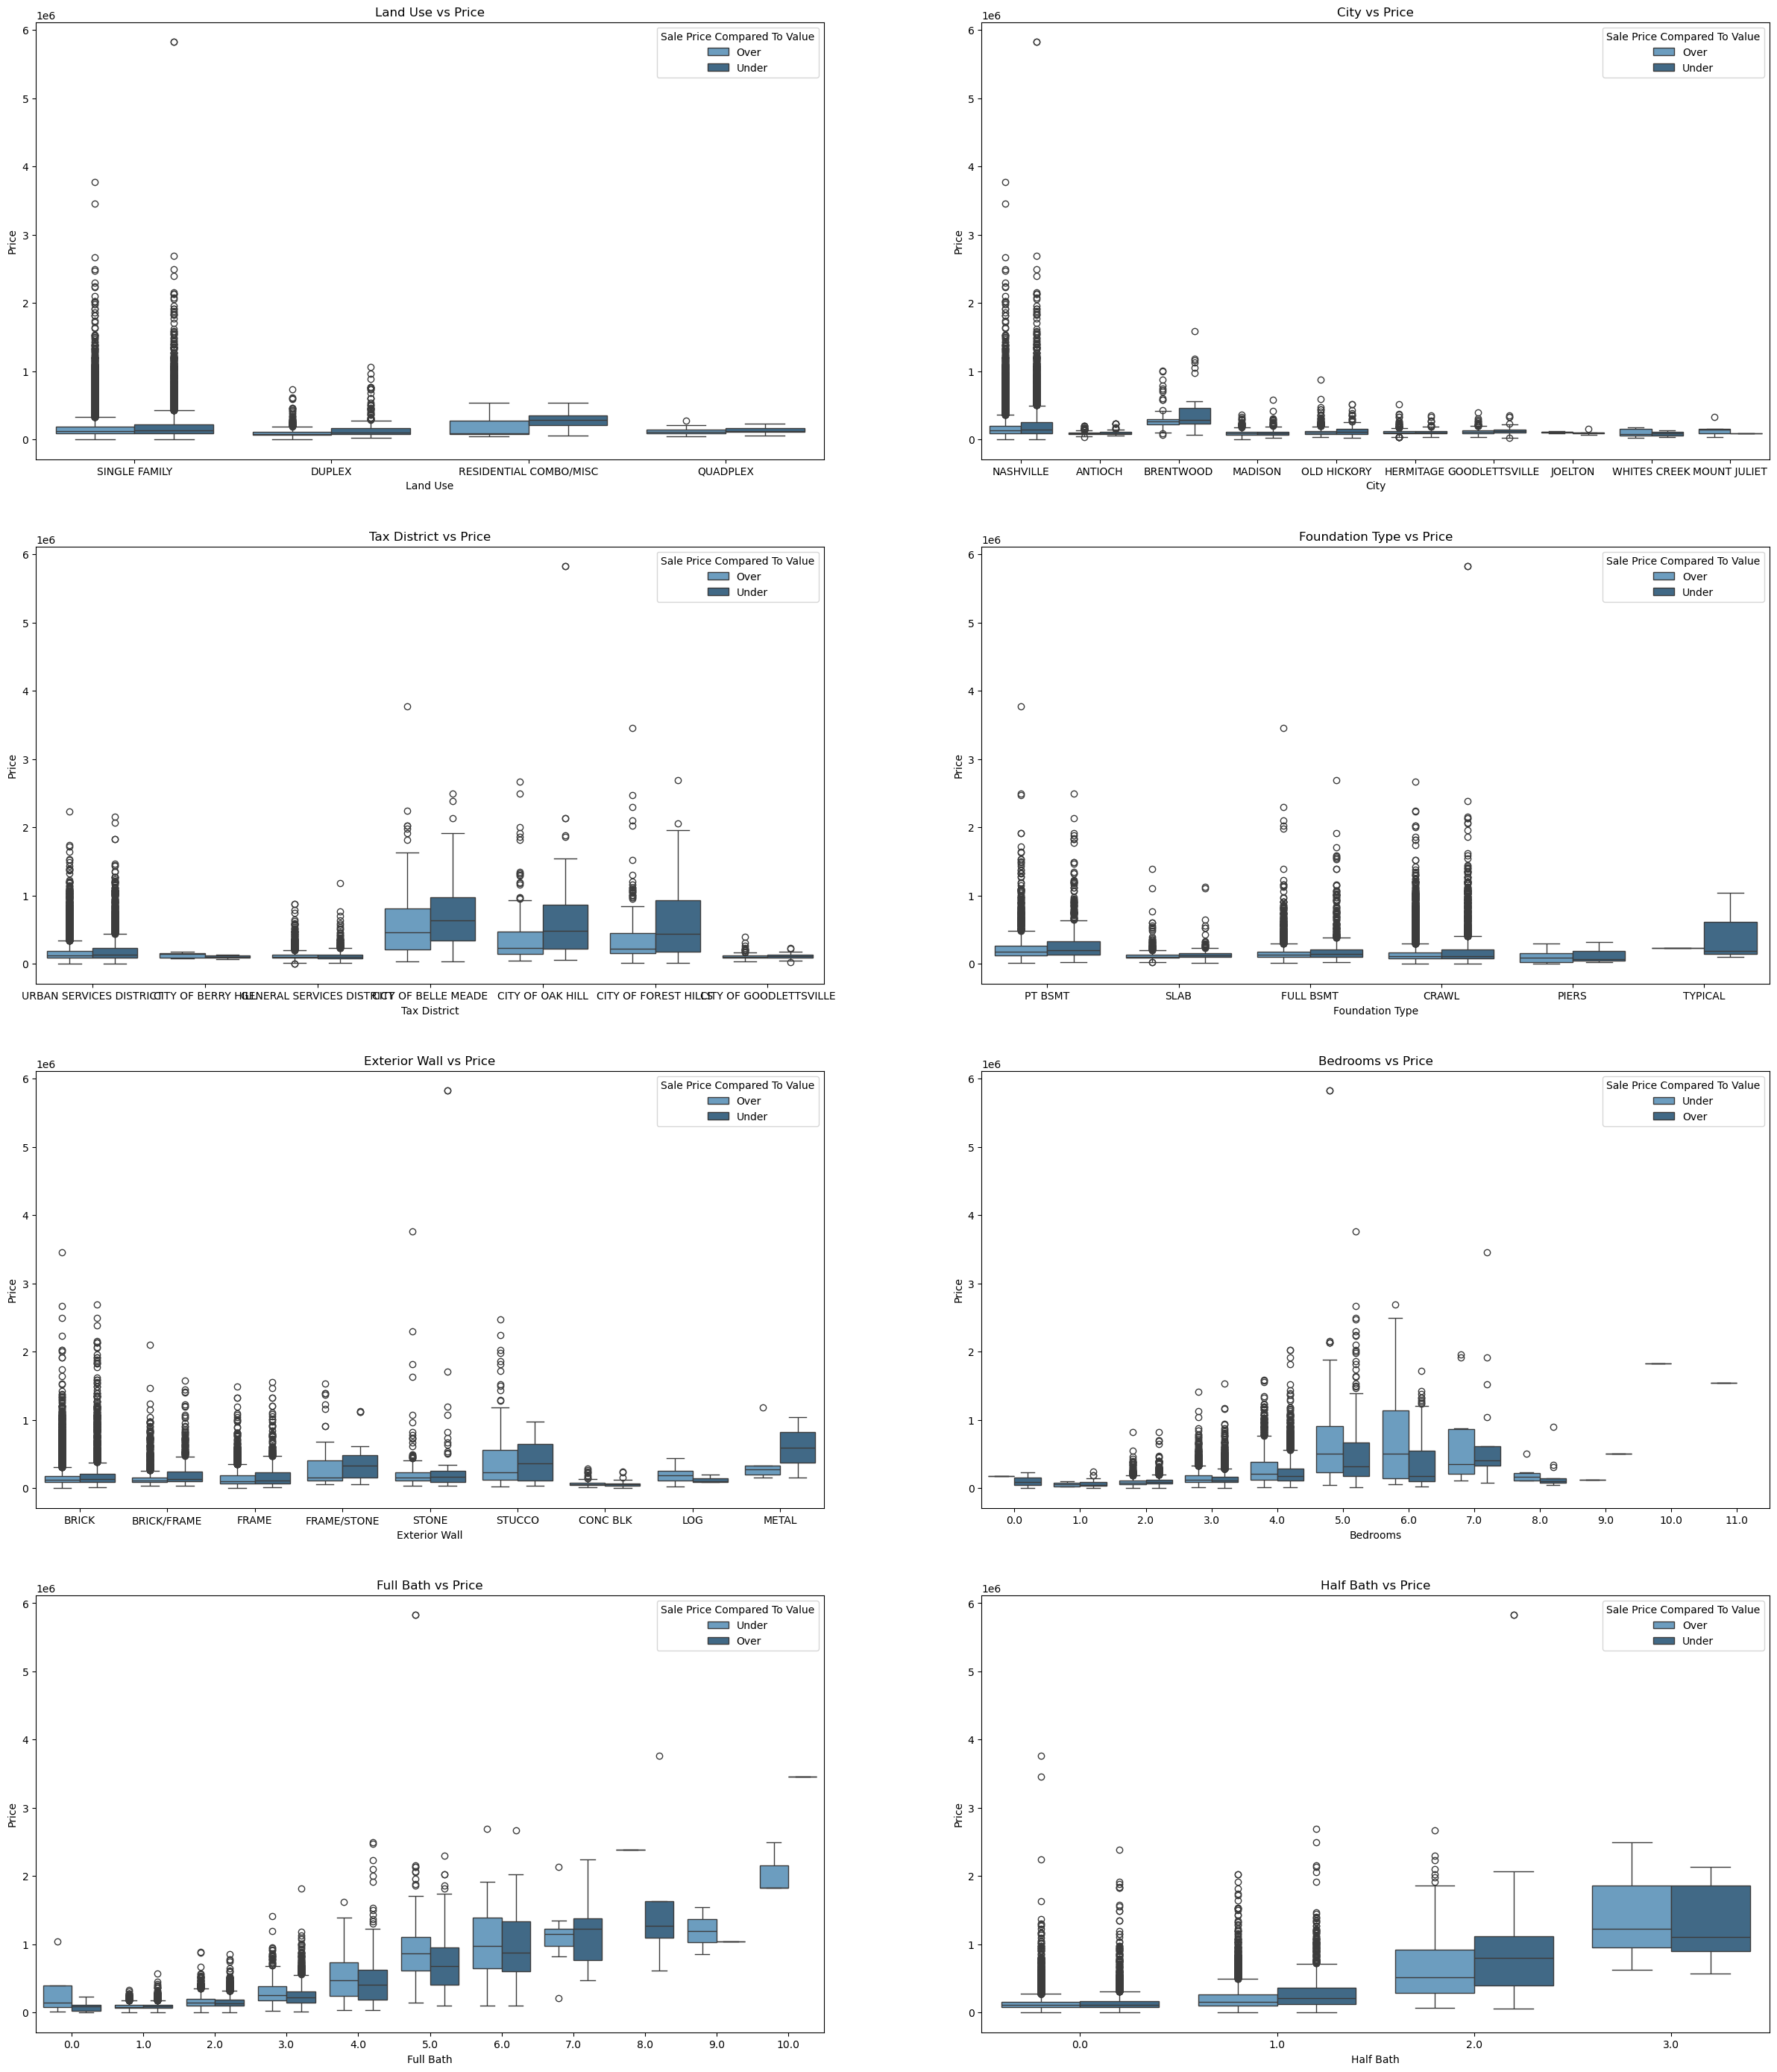

In [103]:
# Boxplot for all categorical columns vs price
cols = ['Land Use', 'City', 'Tax District', 'Foundation Type', 'Exterior Wall', 'Bedrooms', 'Full Bath', 'Half Bath']
fig = 0

plt.figure(figsize=(30,35))
    
for col in cols: 
    fig = fig+1
    plt.subplot(4,2,fig)
    plt.title(col+ ' vs Price')
    ax = sns.boxplot(x = col, \
                     y="Building Value", \
                     data= house_df, \
                     hue="Sale Price Compared To Value", \
                     palette=("Blues_d"))
    plt.ylabel('Price')
    plt.xlabel(col) 

In [104]:
# Average land value each year

land_value = house_df.groupby('Sale_Year').agg({'Land Value':'mean'}).reset_index()
land_value

,Sale_Year,Land Value
0,2013,78721.972912
1,2014,72594.290204
2,2015,65999.274065
3,2016,65223.821384


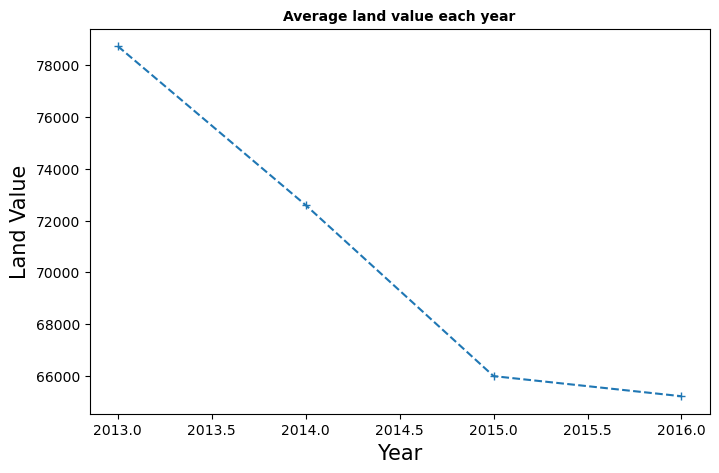

In [105]:
land_value = house_df.groupby('Sale_Year').agg({'Land Value':'mean'}).reset_index()
plt.figure(figsize=[8,5])
plt.plot(list(land_value['Sale_Year']),land_value['Land Value'],"+--")
plt.title('Average land value each year',weight='bold',fontsize='10')
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Land Value',fontsize = 15)
plt.show()

In [106]:
# Average building value each year

building_value = house_df.groupby('Sale_Year').agg({'Building Value':'mean'}).reset_index()
building_value

,Sale_Year,Building Value
0,2013,181654.340242
1,2014,180169.477912
2,2015,173086.895445
3,2016,155575.466999


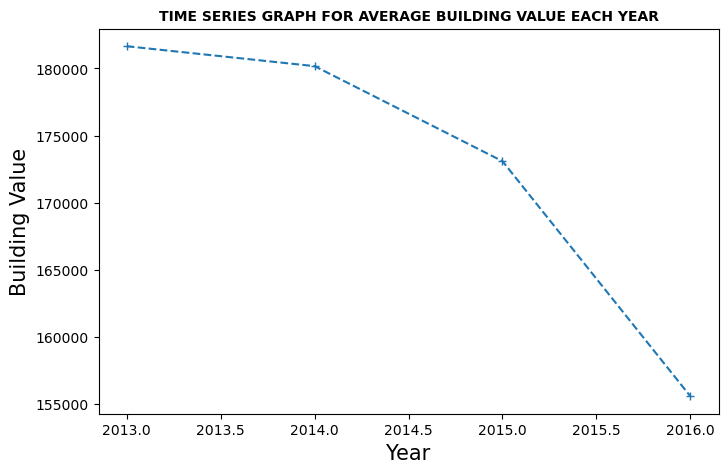

In [107]:
plt.figure(figsize=[8,5])
plt.plot(list(building_value['Sale_Year']),building_value['Building Value'],'+--')
plt.title('TIME SERIES GRAPH FOR AVERAGE BUILDING VALUE EACH YEAR',weight='bold',fontsize='10')
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Building Value',fontsize = 15)
plt.show()

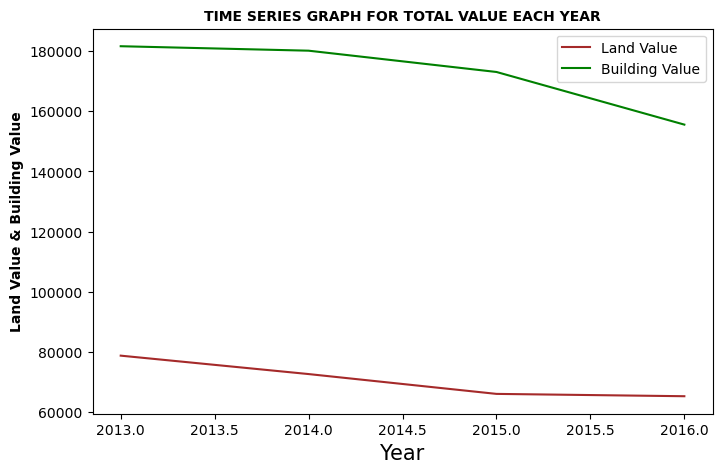

In [108]:
# Comparing the land value and building value each year

land_value=house_df.groupby('Sale_Year').agg({'Land Value':'mean'}).reset_index()
building_value=house_df.groupby('Sale_Year').agg({'Building Value':'mean'}).reset_index()

plt.figure(figsize=[8,5])
plt.plot(list(land_value['Sale_Year']),land_value['Land Value'],color='brown')
plt.plot(list(building_value['Sale_Year']),building_value['Building Value'],color='green')
plt.title('TIME SERIES GRAPH FOR TOTAL VALUE EACH YEAR',weight='bold',fontsize='10')
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Land Value & Building Value',weight='bold',fontsize = 10)
plt.legend(['Land Value','Building Value'],loc='upper right')
plt.show()

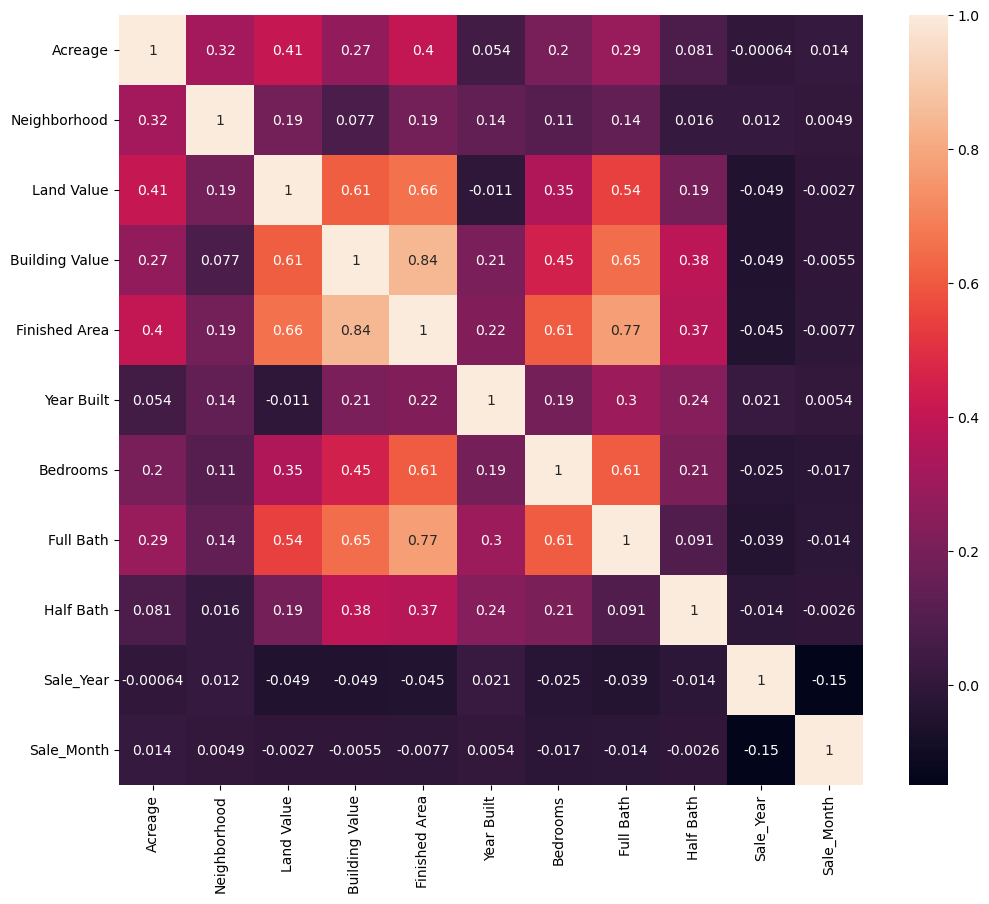

In [110]:
# Selecting only numeric columns
numeric_df = house_df.select_dtypes(include=[float, int])

# Checking the correlation between variables
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), cmap="rocket", annot=True)
plt.show()

## Analysis

In [ ]:
def convert_to_binary(df, col):
    replace_this = df[col].unique()
    replace_with = np.arange(len(replace_this))
    replace(df, col, replace_this, replace_with)
    
def replace(df, col, replace_this, replace_with):
    df[col].replace(replace_this, replace_with, inplace=True)
    

def to_one_hot(df, col):
    one_hot = pd.get_dummies(df[col])
    one_hot.columns = col+"_"+one_hot.columns
    
    df.drop(col, axis=1, inplace=True)
    df = df.join(one_hot)  
    return df

In [ ]:
def calc_VIF(x):
  vif= pd.DataFrame()
  vif['variables']=x.columns
  vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

  return(vif)

In [ ]:
def results_summary_to_dataframe(results):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"p_vals":pvals,
                               "coeff":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })

    #Reordering...
    results_df = results_df[["coeff","p_vals","conf_lower","conf_higher"]]
    return results_df

In [ ]:
def confusion_mat(cm, ticks = ["False", "True"]):
    ax = sns.heatmap(cm/np.sum(cm), annot=True, 
                fmt='.2%', cmap='Blues')

    ax.set_title('Confusion Matrix \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(ticks)
    ax.yaxis.set_ticklabels(ticks)

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [ ]:
numerical = house_df._get_numeric_data()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=numerical.iloc[:,:-1]
calc_VIF(x)

,variables,VIF
0,Acreage,2.129928
1,Neighborhood,6.172826
2,Land Value,3.025083
3,Building Value,7.162190
4,Finished Area,28.007011
5,Year Built,7327.456584
6,Bedrooms,27.027485
7,Full Bath,16.504982
8,Half Bath,1.892318
9,Sale_Year,7163.736633


In [ ]:
df1 = house_df.drop(['Year Built','Sale_Year','Finished Area', 'Bedrooms'],axis=1)
numerical = df1._get_numeric_data() #drop non-numeric cols
x=numerical.iloc[:,:-1]
calc_VIF(x)

,variables,VIF
0,Acreage,2.018795
1,Neighborhood,3.773529
2,Land Value,2.656083
3,Building Value,4.429855
4,Full Bath,6.231119
5,Half Bath,1.553747


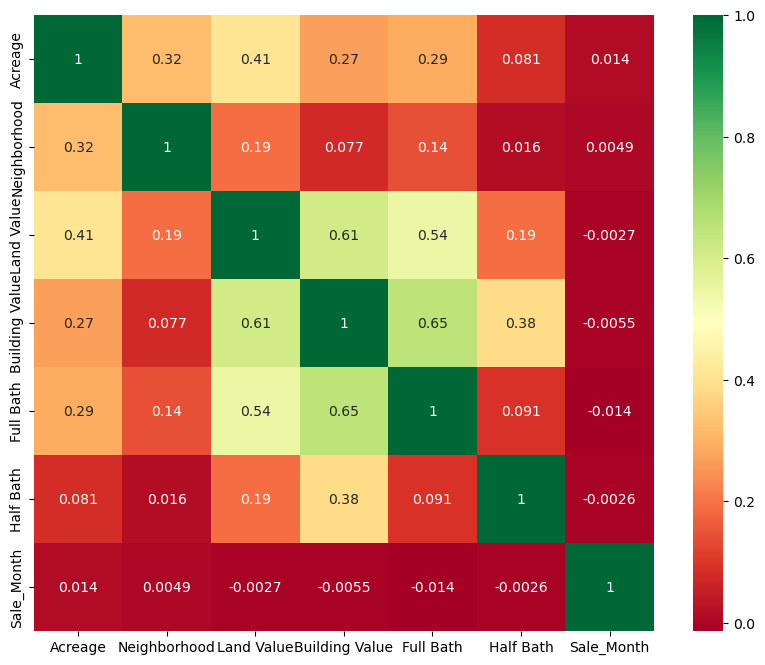

In [ ]:
# correlation plot for numerical variables

plt.figure(figsize=(10, 8))
sns.heatmap(numerical.corr(), cmap="RdYlGn", annot=True);

In [ ]:
# Converting column values to binary

convert_to_binary(df1, 'Sold As Vacant')
convert_to_binary(df1, 'Multiple Parcels Involved in Sale')
convert_to_binary(df1, 'Sale Price Compared To Value')

/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_95188/3945103188.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(replace_this, replace_with, inplace=True)
/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_95188/3945103188.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasti

In [ ]:
# Creating dummy variables


df1 = to_one_hot(df1, "Land Use")
df1 = to_one_hot(df1, "City")
df1 = to_one_hot(df1, "Tax District")
df1 = to_one_hot(df1, "Foundation Type")
df1 = to_one_hot(df1, "Exterior Wall")
df1 = to_one_hot(df1, "Grade")

df1

,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Neighborhood,Land Value,Building Value,Full Bath,Half Bath,Sale Price Compared To Value,Sale_Month,...,Grade_A,Grade_AAB,Grade_B,Grade_C,Grade_D,Grade_E,Grade_OFB,Grade_OFC,Grade_SSC,Grade_X
0,0,0,0.17,3127,32000,134400,1.0,0.0,0,1,...,False,False,False,True,False,False,False,False,False,False
1,0,0,0.11,9126,34000,157800,2.0,1.0,0,1,...,False,False,False,True,False,False,False,False,False,False
2,0,0,0.17,3130,25000,243700,2.0,0.0,1,1,...,False,False,True,False,False,False,False,False,False,False
3,0,0,0.34,3130,25000,138100,1.0,0.0,1,1,...,False,False,False,True,False,False,False,False,False,False
4,0,0,0.17,3130,25000,86100,1.0,0.0,1,1,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,0,0,0.38,6328,25000,105000,2.0,0.0,0,10,...,False,False,False,True,False,False,False,False,False,False
22647,0,0,0.27,6328,25000,142400,3.0,0.0,0,10,...,False,False,False,True,False,False,False,False,False,False
22648,0,0,0.23,6328,25000,159300,3.0,0.0,0,10,...,False,False,False,True,False,False,False,False,False,False
22649,0,0,0.15,126,40000,204100,2.0,1.0,0,10,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
X = df1.drop(columns=['Sale Price Compared To Value'])
x_constant = sm.add_constant(X)
y = df1['Sale Price Compared To Value'].tolist()

/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_95188/1521058916.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=p_values, y=p_values.index,palette = "mako")


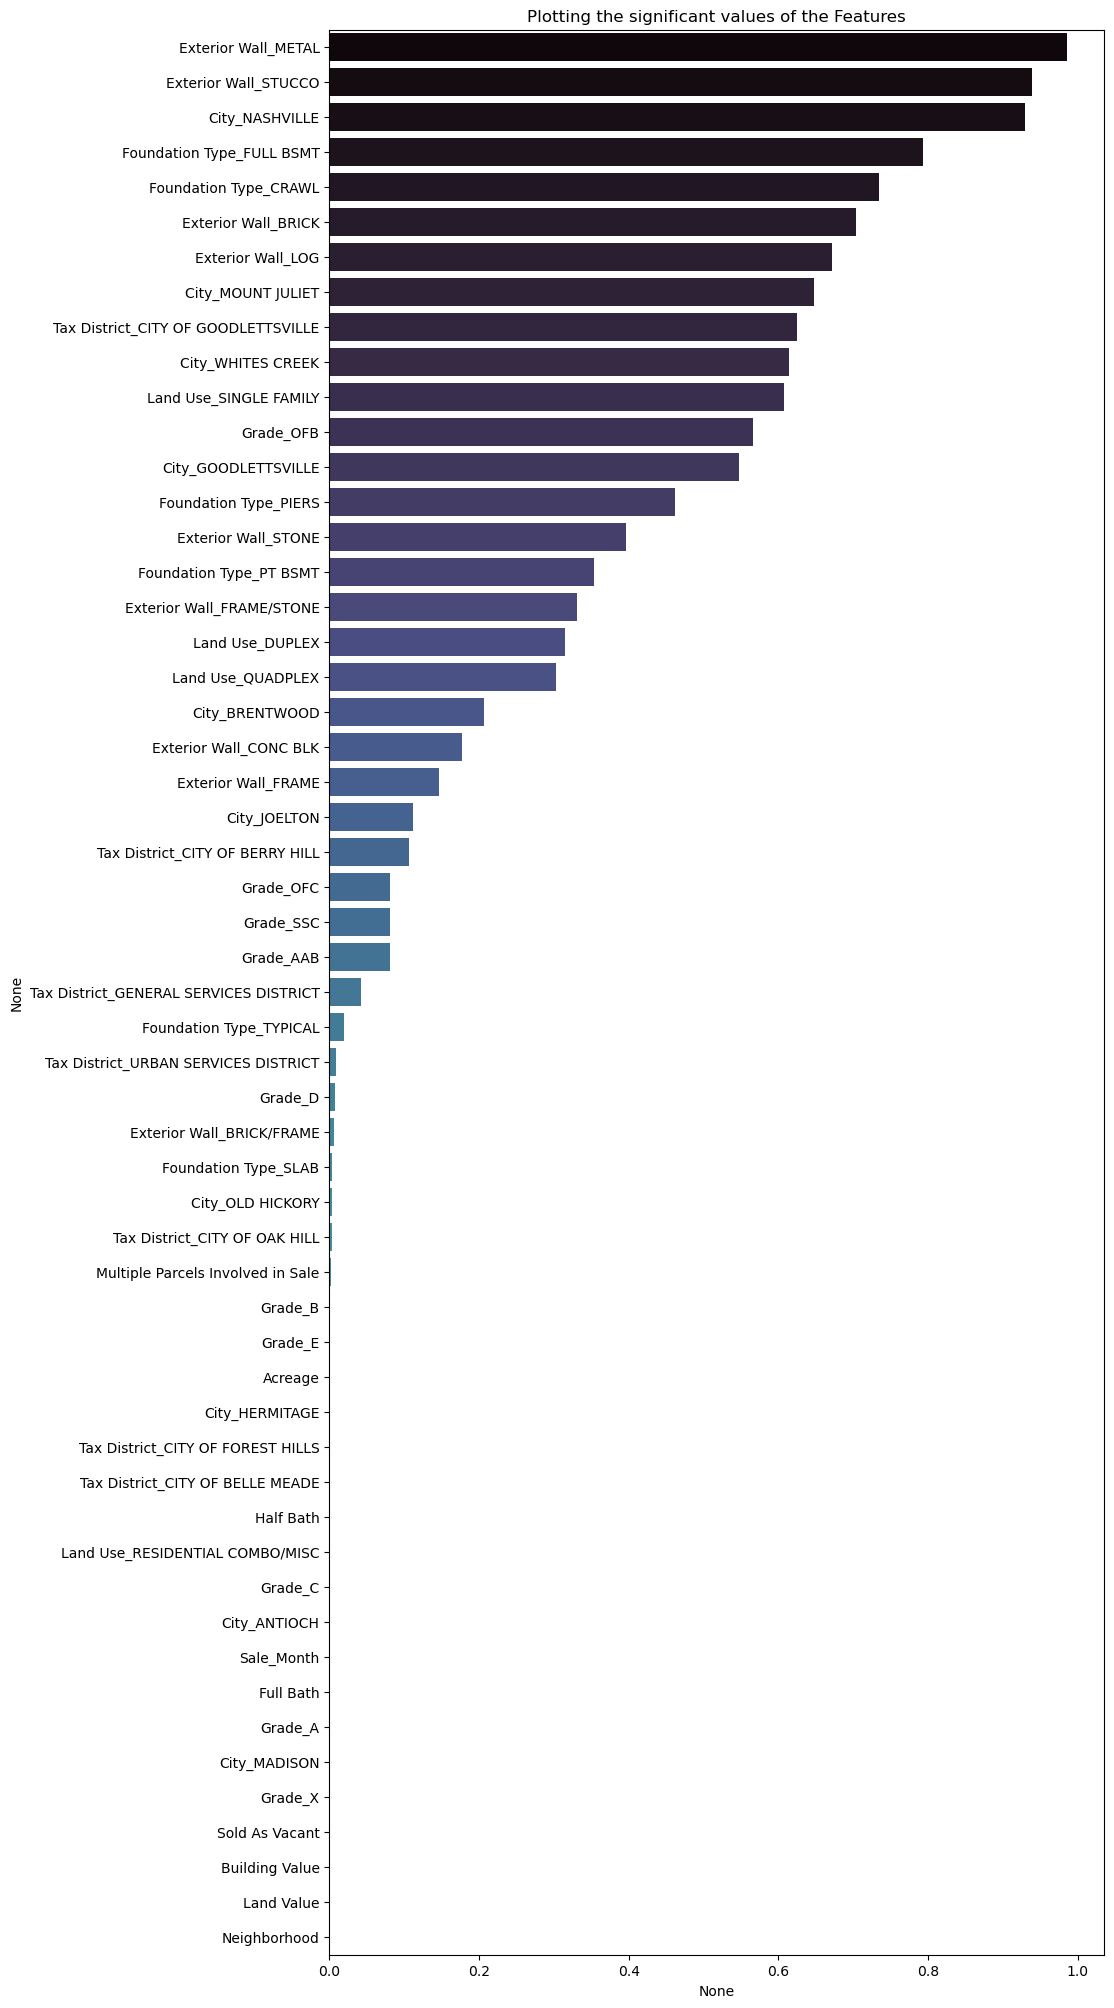

In [ ]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X,y)


#plotting the p-values
plt.figure(figsize=(10,25))
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

#p_values.plot.bar()
ax = sns.barplot(x=p_values, y=p_values.index,palette = "mako")
ax.set_title('Plotting the significant values of the Features');

In [ ]:
# scaling the feature variables.
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

X_scale = preprocessing.MinMaxScaler()
X_scale.fit(X)
# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables a DataFrame.
X_scale = X_scale.fit_transform(X)

Z = pd.DataFrame(X_scale,columns=X.columns)

In [ ]:
# Splitting Dataset

X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=42, \
                                                    shuffle=True, stratify=df1['Sale Price Compared To Value'])

In [ ]:
# Logistic Regression

x2=sm.add_constant(X_train)
est=sm.OLS(y_train,x2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     15.98
Date:                Sat, 03 Aug 2024   Prob (F-statistic):          3.46e-127
Time:                        09:13:36   Log-Likelihood:                -10085.
No. Observations:               18088   AIC:                         2.027e+04
Df Residuals:                   18039   BIC:                         2.065e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [ ]:
df_results = results_summary_to_dataframe(est2)
df_results['absolute_coeff'] = np.abs(df_results['coeff'])
df_results = df_results.sort_values(['absolute_coeff', 'p_vals'], ascending=[False, True])

df_results= df_results[df_results['p_vals'] > 0.05]
df_results

,coeff,p_vals,conf_lower,conf_higher,absolute_coeff
const,-1.523552e+11,0.093709,-3.305105e+11,2.580001e+10,1.523552e+11
Land Use_RESIDENTIAL COMBO/MISC,1.378643e+11,0.093709,-2.334610e+10,2.990746e+11,1.378643e+11
Land Use_QUADPLEX,1.378643e+11,0.093709,-2.334610e+10,2.990746e+11,1.378643e+11
Land Use_DUPLEX,1.378643e+11,0.093709,-2.334610e+10,2.990746e+11,1.378643e+11
Land Use_SINGLE FAMILY,1.378643e+11,0.093709,-2.334610e+10,2.990746e+11,1.378643e+11
Exterior Wall_METAL,-4.939773e+10,0.093709,-1.071605e+11,8.365071e+09,4.939773e+10
Exterior Wall_STUCCO,-4.939773e+10,0.093709,-1.071605e+11,8.365071e+09,4.939773e+10
Exterior Wall_STONE,-4.939773e+10,0.093709,-1.071605e+11,8.365071e+09,4.939773e+10
Exterior Wall_FRAME,-4.939773e+10,0.093709,-1.071605e+11,8.365071e+09,4.939773e+10
Exterior Wall_BRICK/FRAME,-4.939773e+10,0.093709,-1.071605e+11,8.365071e+09,4.939773e+10


In [ ]:
# Pruning

from sklearn.linear_model import LogisticRegression
from sklearn import metrics


# X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=42, shuffle=True, stratify=df1['Sale Price Compared To Value'])
logreg = LogisticRegression(random_state = 42, solver='lbfgs')
logreg.fit(X_train, y_train)

/opt/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

/opt/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


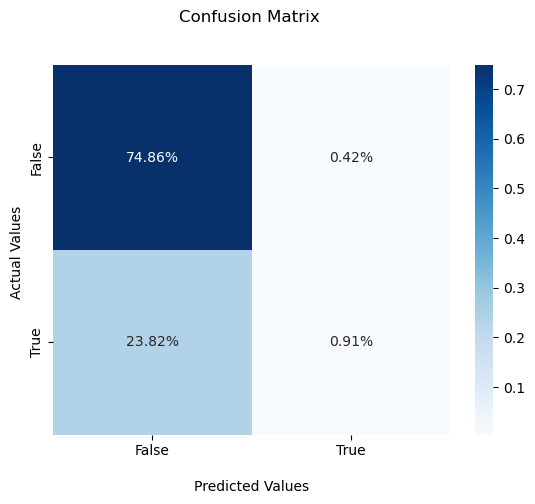

In [ ]:
# Confusion matrix for logistic regression

logreg = LogisticRegression(random_state = 2, solver='lbfgs')

logreg.fit(X_train,y_train)


y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
confusion_mat(cm)

In [112]:
y_pred = logreg.predict(X_test)
print('Model accuracy score: {0:0.5f}'. format(accuracy_score(y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Model accuracy score: 0.75763
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      3404
           1       0.68      0.04      0.07      1118

    accuracy                           0.76      4522
   macro avg       0.72      0.52      0.47      4522
weighted avg       0.74      0.76      0.67      4522

Precision: 0.6833333333333333
Recall: 0.03667262969588551


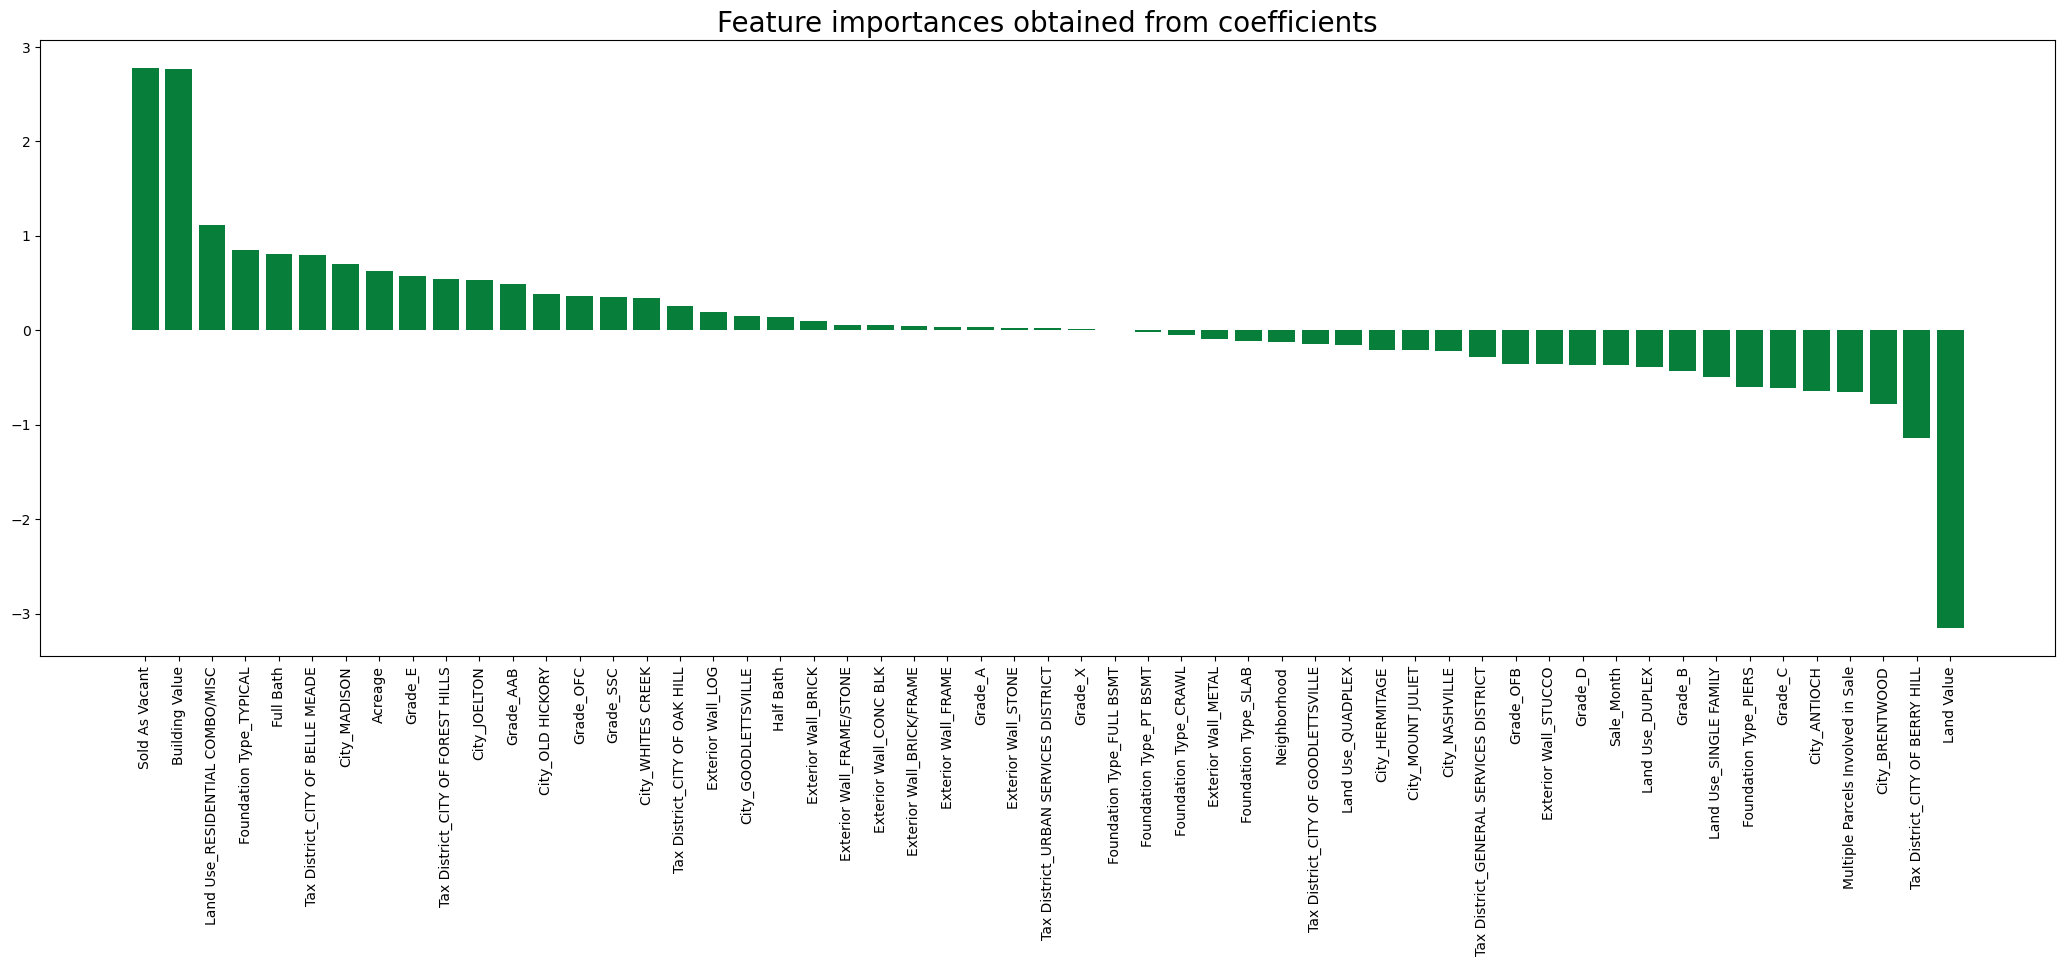

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': logreg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
importances

plt.figure(figsize=(26,8))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E3B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
# Splitting the data into train and test set

X_training_process, X_test, y_training_process, y_test = train_test_split(Z, y, test_size=0.2, random_state=42, \
                                                    shuffle=True, stratify=df1['Sale Price Compared To Value'])
X_train, X_validation, y_train, y_validation = train_test_split(X_training_process, y_training_process, test_size=0.2, random_state=42, \
                                                    shuffle=True)

In [ ]:
# hyper parameter tuning

def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(30,25))
    _ = tree.plot_tree(dt_classifier,\
                       feature_names=X.columns, \
                       class_names=['No', "Yes"],
                       filled=True)

In [ ]:
max_depth= [5]

In [ ]:
# make dataframe with cols: depth, acccuray, precision, recall
cols = ['Depth','Validation Accuracy', 'Validation Precision', 'Validation Recall']

dt_class = pd.DataFrame(columns = cols)

for depth in max_depth:
    dt_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=depth, min_samples_leaf=2)   
    dt_model.fit(X_train,y_train)
    y_predD = dt_model.predict(X_validation)
    dt_class.loc[(len(dt_class))] = [depth, \
                       round(accuracy_score(y_predD, y_validation)*100,2), \
                       round(precision_score(y_predD, y_validation)*100,2), \
                       round(recall_score(y_predD, y_validation)*100,2)]

Accuracy: 75.74%
Precision: 5.28%
Recall: 60.82%


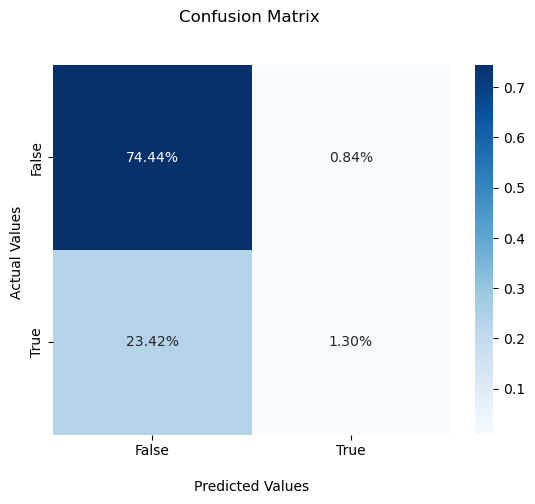

In [ ]:
dt_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth= 5, min_samples_leaf=2)   
dt_model.fit(X_training_process,y_training_process)

y_predD = dt_model.predict(X_test)

print('Accuracy: '+str(round(accuracy_score(y_predD, y_test)*100,2))+'%')
print('Precision: '+str(round(precision_score(y_predD, y_test)*100,2))+'%')
print('Recall: '+str(round(recall_score(y_predD, y_test)*100,2))+'%')

cm = confusion_matrix(y_test, y_predD)
confusion_mat(cm)

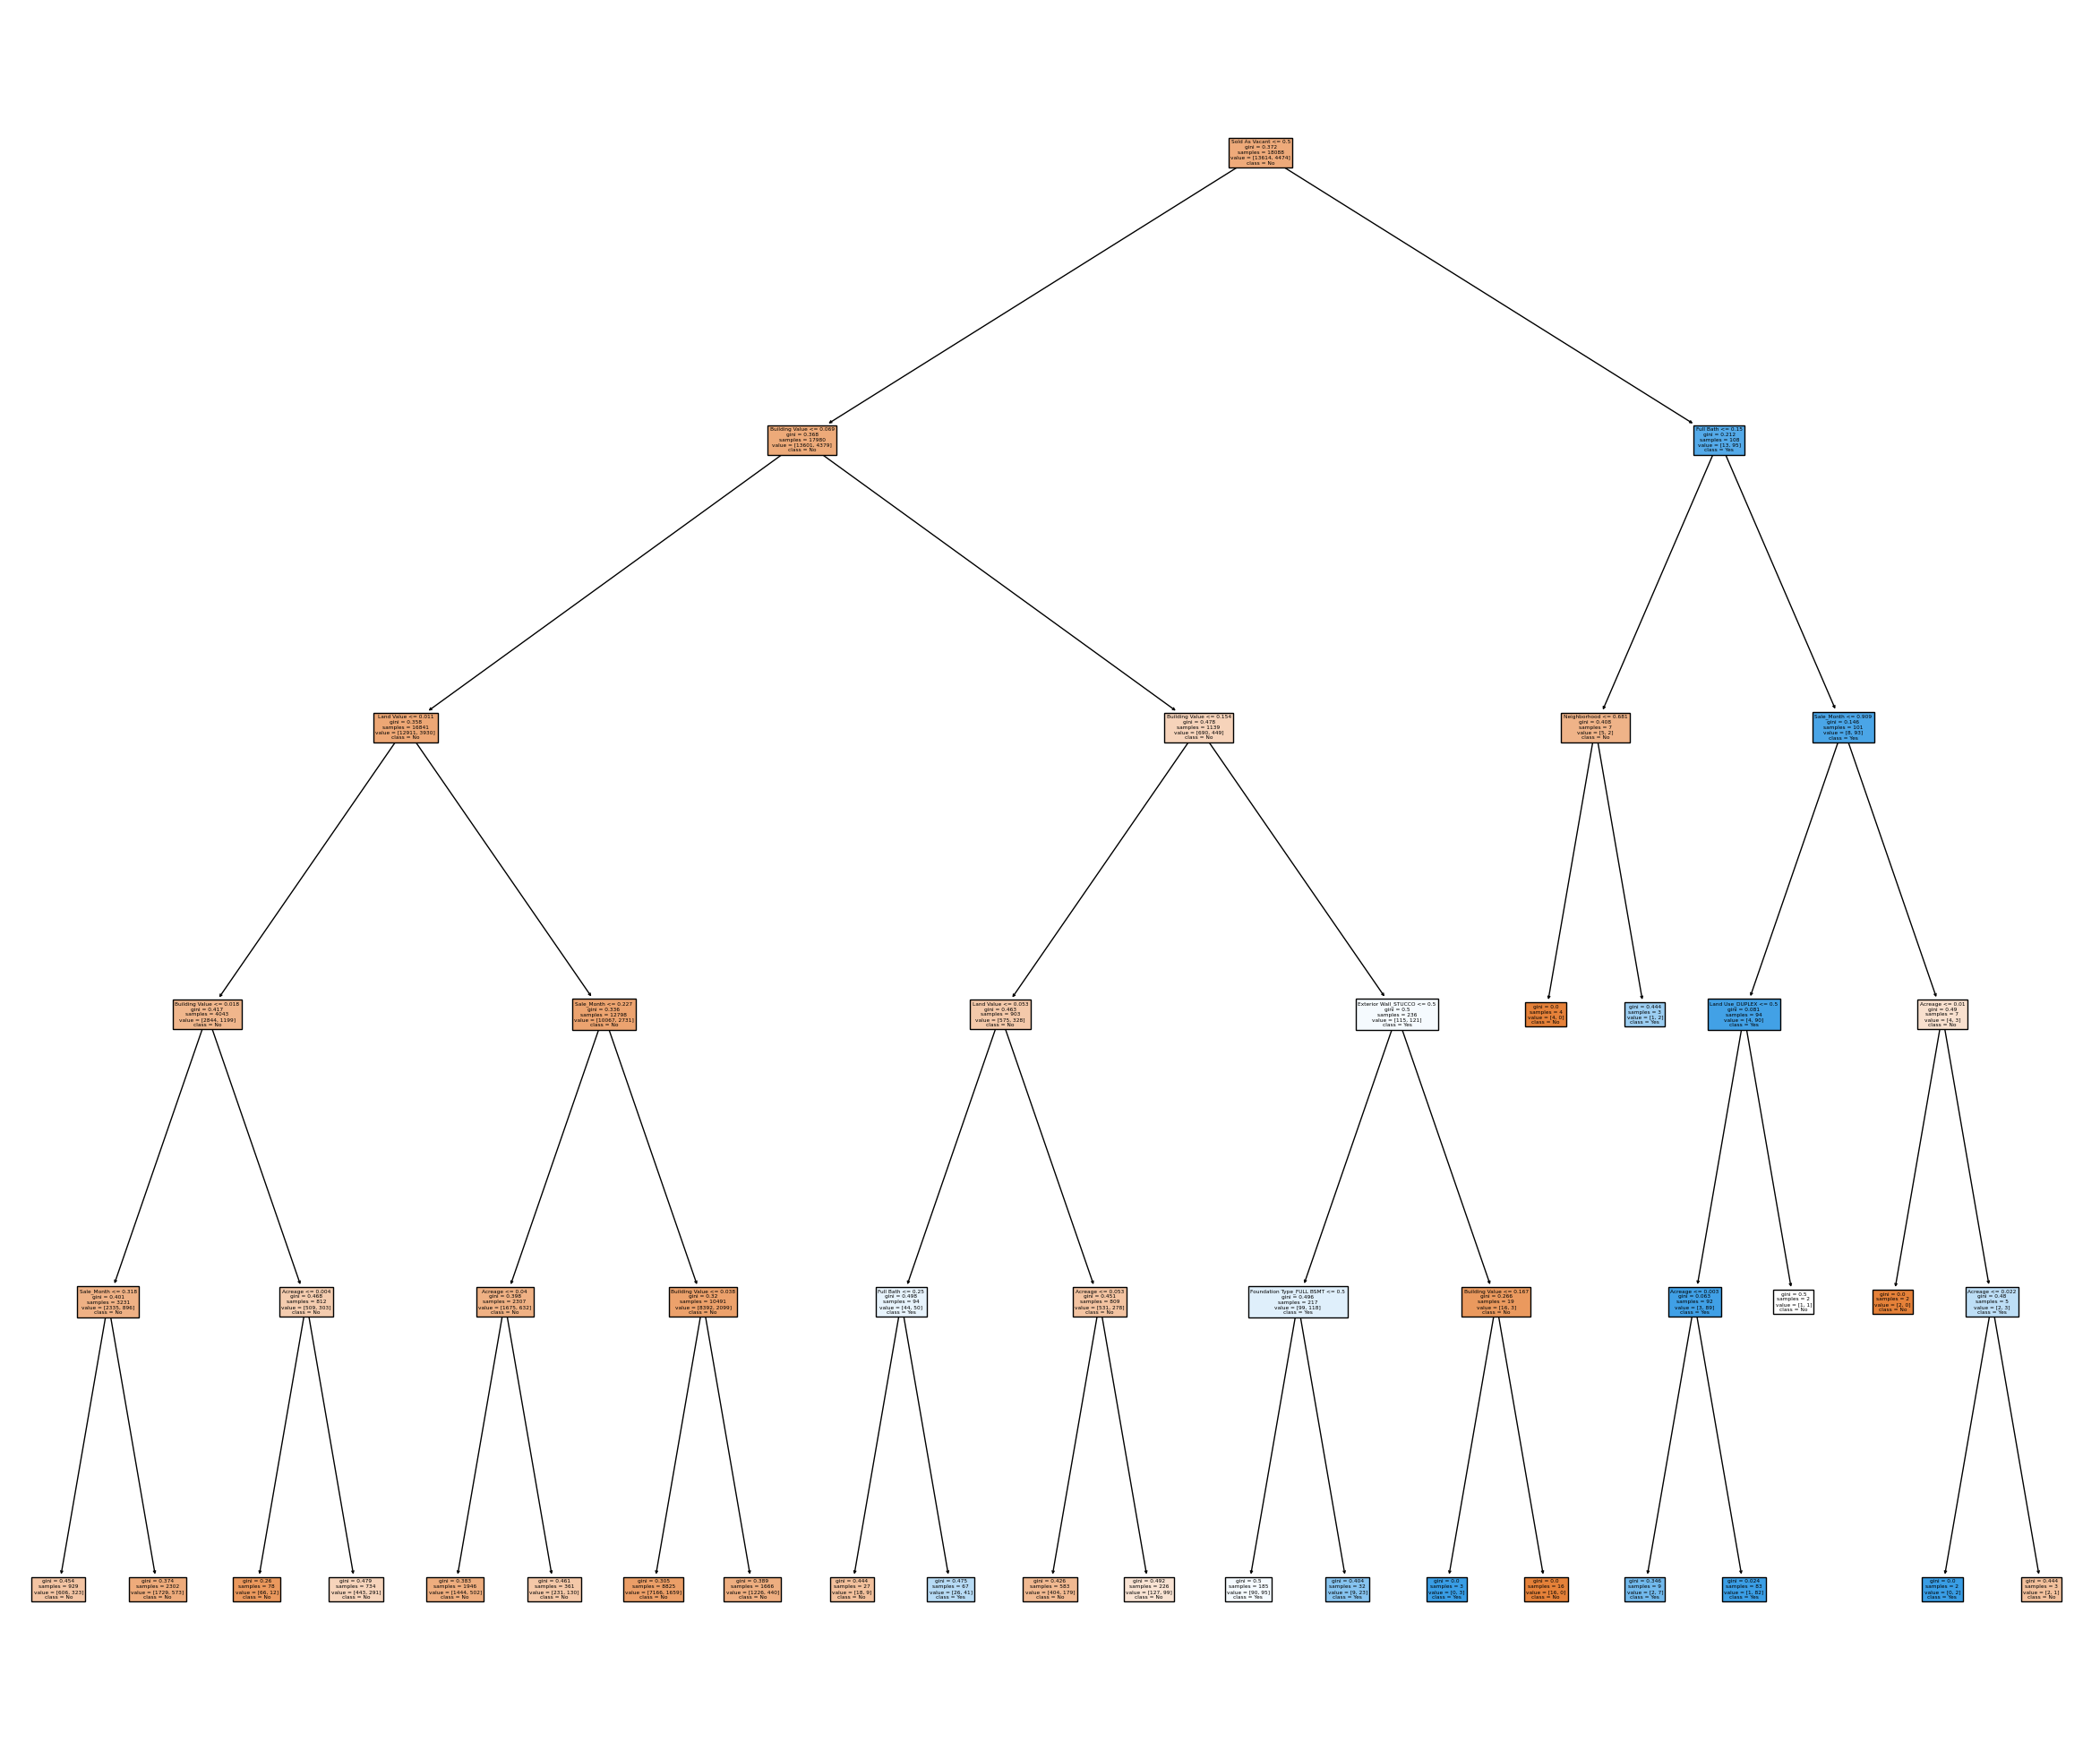

In [ ]:
tree = get_dt_graph(dt_model)

/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_95188/3540421799.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(feature_scores.index)


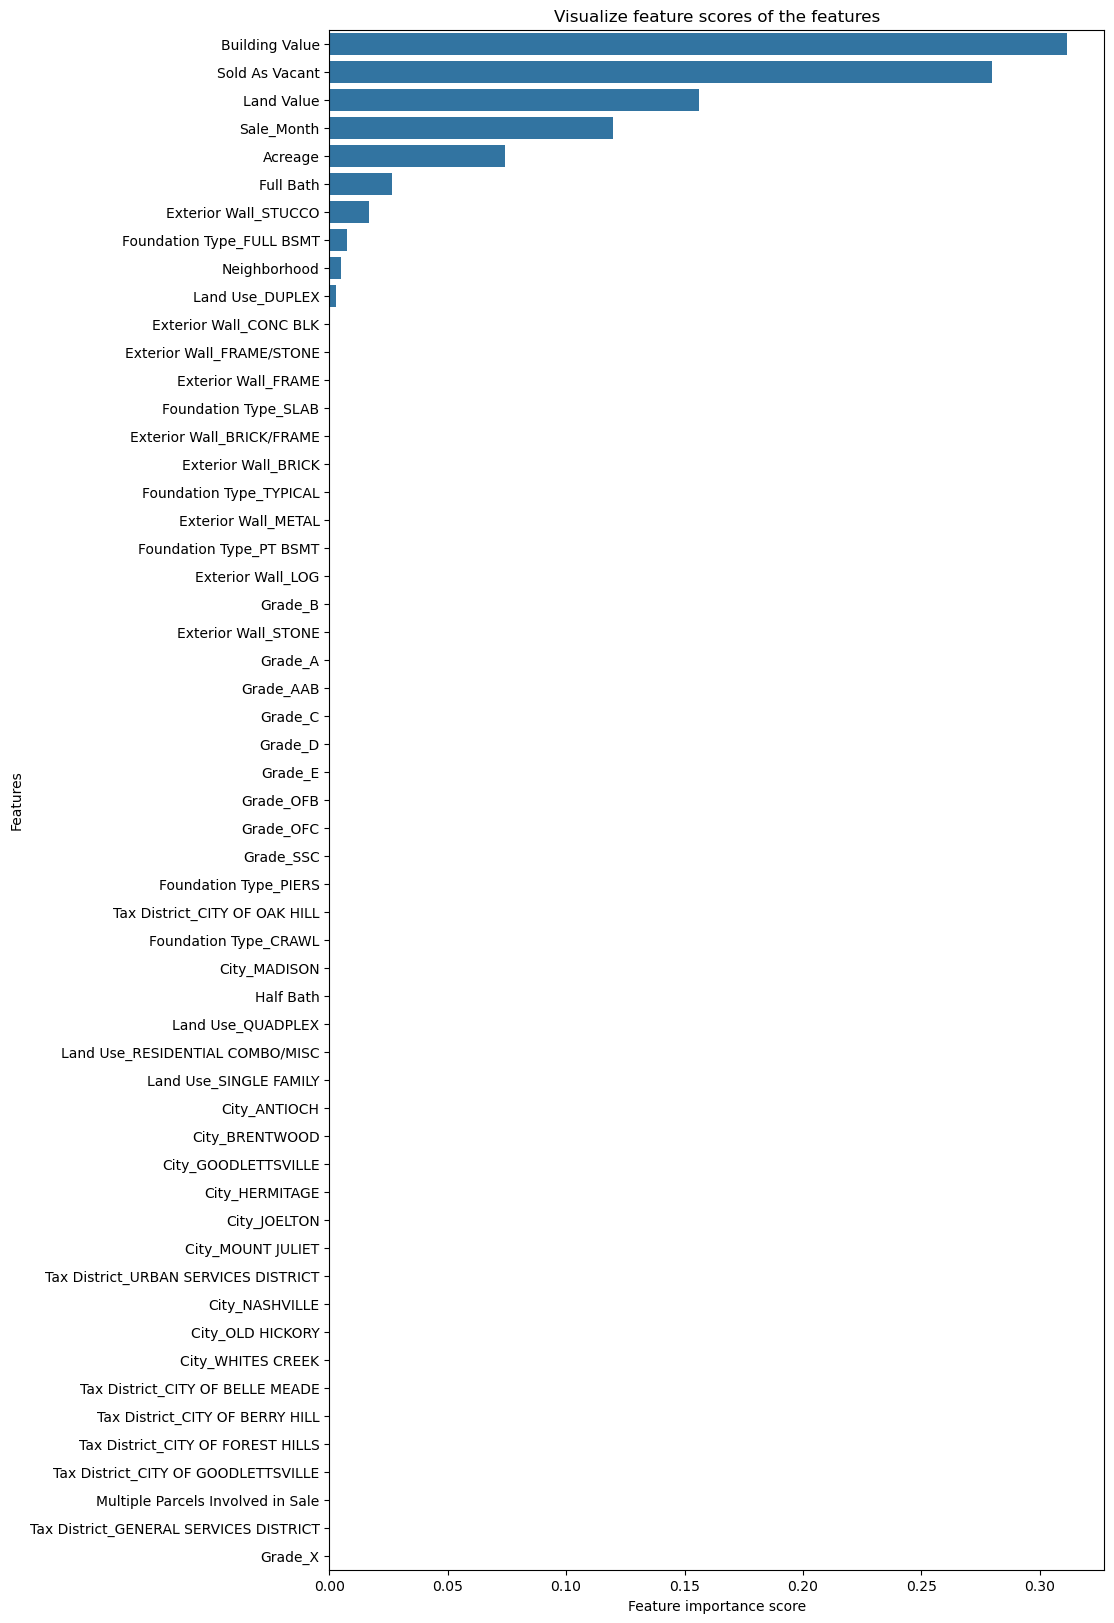

In [ ]:
#Feature Importance
feature_scores = pd.Series(dt_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# print(feature_scores)

f, ax = plt.subplots(figsize=(10, 20))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

## Random Forest

In [ ]:
max_depth= [5]

/opt/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy : 75.14%
Precision : 16.37%
Recall : 49.19%


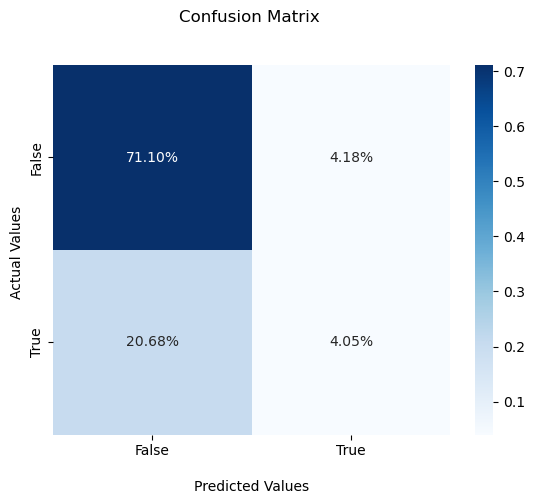

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state= 42, max_features= 'auto',\
                                  criterion="entropy",min_samples_leaf= 1, n_estimators= 100)   
rf_model.fit(X_train,y_train)



#Accuracy

y_predRF = rf_model.predict(X_test)
print('Accuracy : '+str(round(accuracy_score(y_predRF, y_test)*100,2))+'%')
print('Precision : '+str(round(precision_score(y_predRF, y_test)*100,2))+'%')
print('Recall : '+str(round(recall_score(y_predRF, y_test)*100,2))+'%')

#Confusion Matrix

cm = confusion_matrix(y_test, y_predRF)
confusion_mat(cm)

/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_95188/1807869471.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(feature_scores.index)


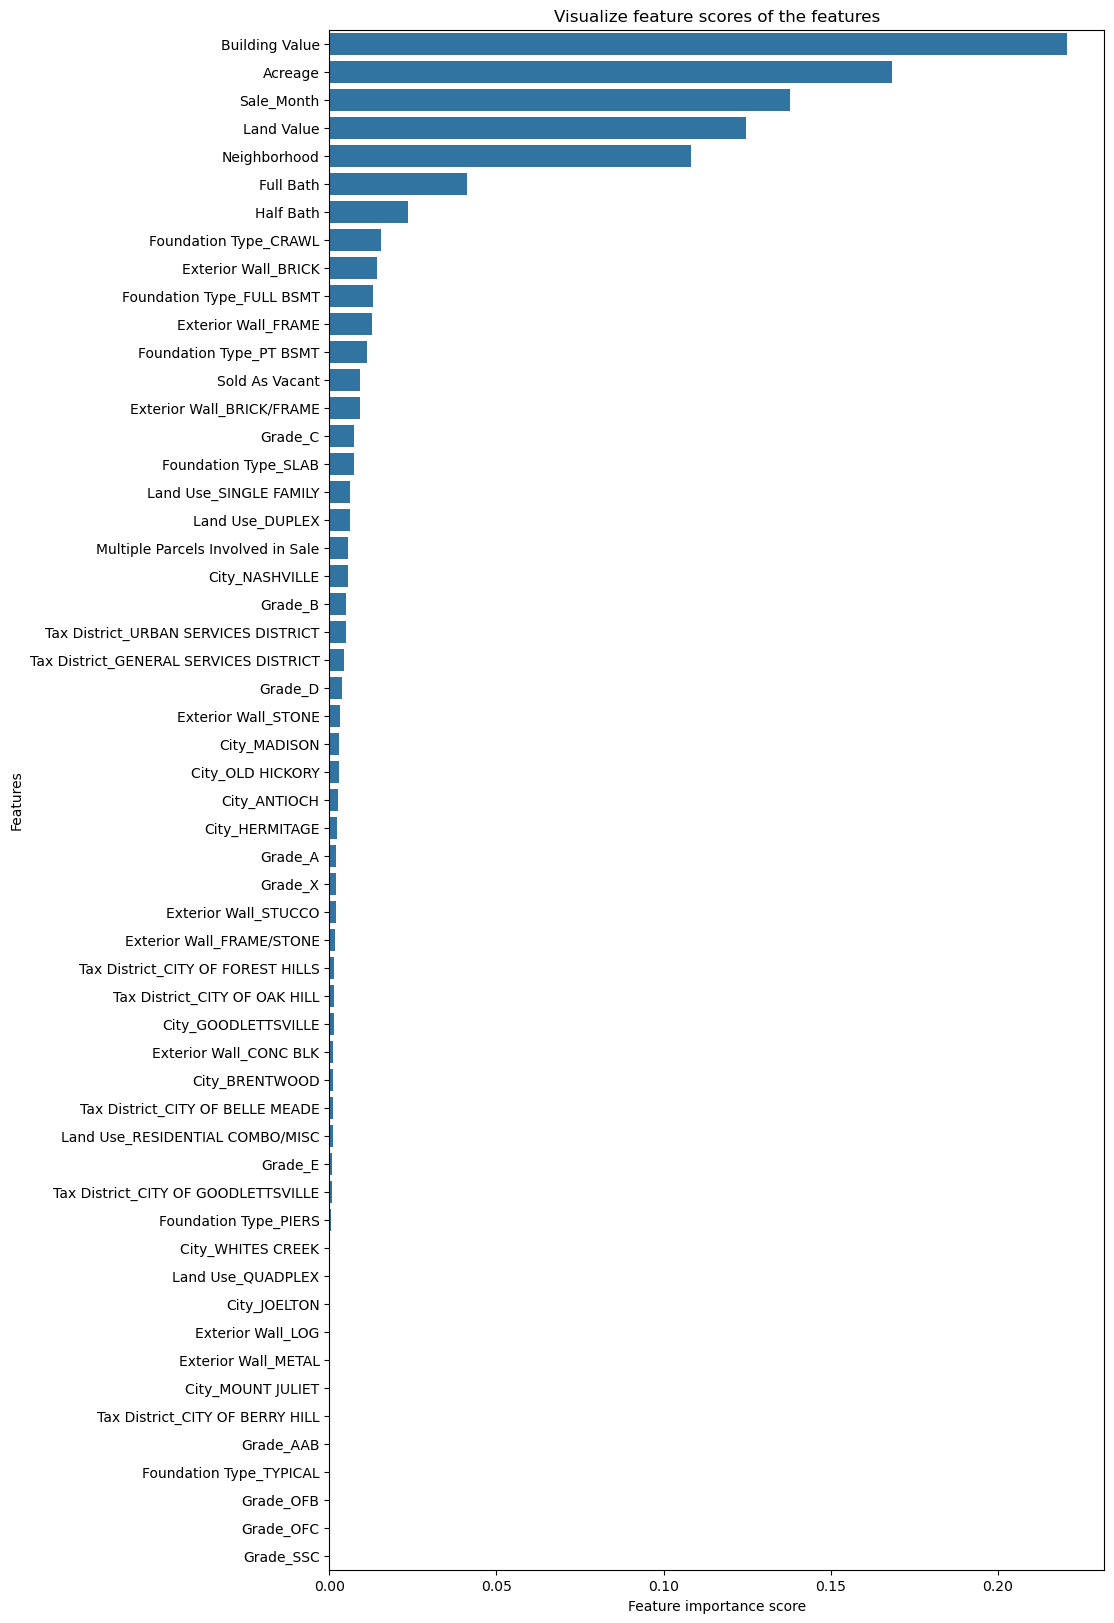

In [ ]:
#Feature Importance

feature_scores = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# print(feature_scores)

f, ax = plt.subplots(figsize=(10, 20))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

## Gradient Boosting

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.8 MB/s eta 0:00:00 0:00:01


In [ ]:
import xgboost as xgb

# Creating the XGBClassfier shell
clf_xgb = xgb.XGBClassifier()  

# Adding the data and fitting the model
# Instead of finding the optimal # of tress using K-Cross Validation, let's use early stopping to stop the tree when the cost function no longer reduces
# XGBoost will do the cross validation for us; we just have to specifiy the # of rounds to exhaust with no improvement before stopping
# We use evaluation metric as Area Under Precision-Recall Curve
clf_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy of xgb: 75.92%
Precision of xgb: 4.83%
Recall of xgb: 68.35%


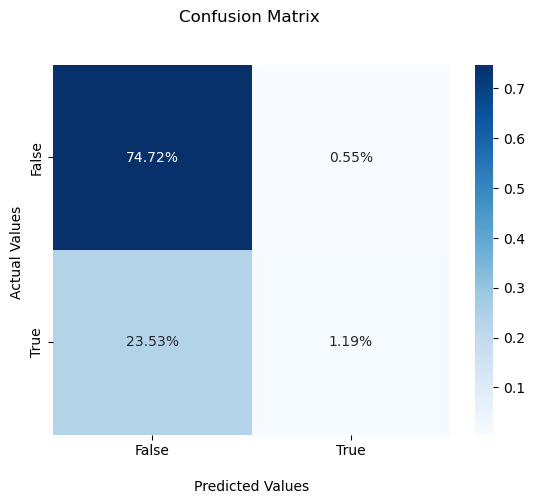

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

clf_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth= 5,
              min_child_weight=1, missing=1, n_estimators=100, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

clf_xgb.fit(X_train,y_train)

y_predgb = clf_xgb.predict(X_test)
#Accuracy

y_predRF = rf_model.predict(X_test)
print('Accuracy of xgb: '+str(round(accuracy_score(y_predgb, y_test)*100,2))+'%')
print('Precision of xgb: '+str(round(precision_score(y_predgb, y_test)*100,2))+'%')
print('Recall of xgb: '+str(round(recall_score(y_predgb, y_test)*100,2))+'%')

#Confusion Matrix

cm = confusion_matrix(y_test, y_predgb)
confusion_mat(cm)

/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_95188/988523441.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(feature_scores.index)


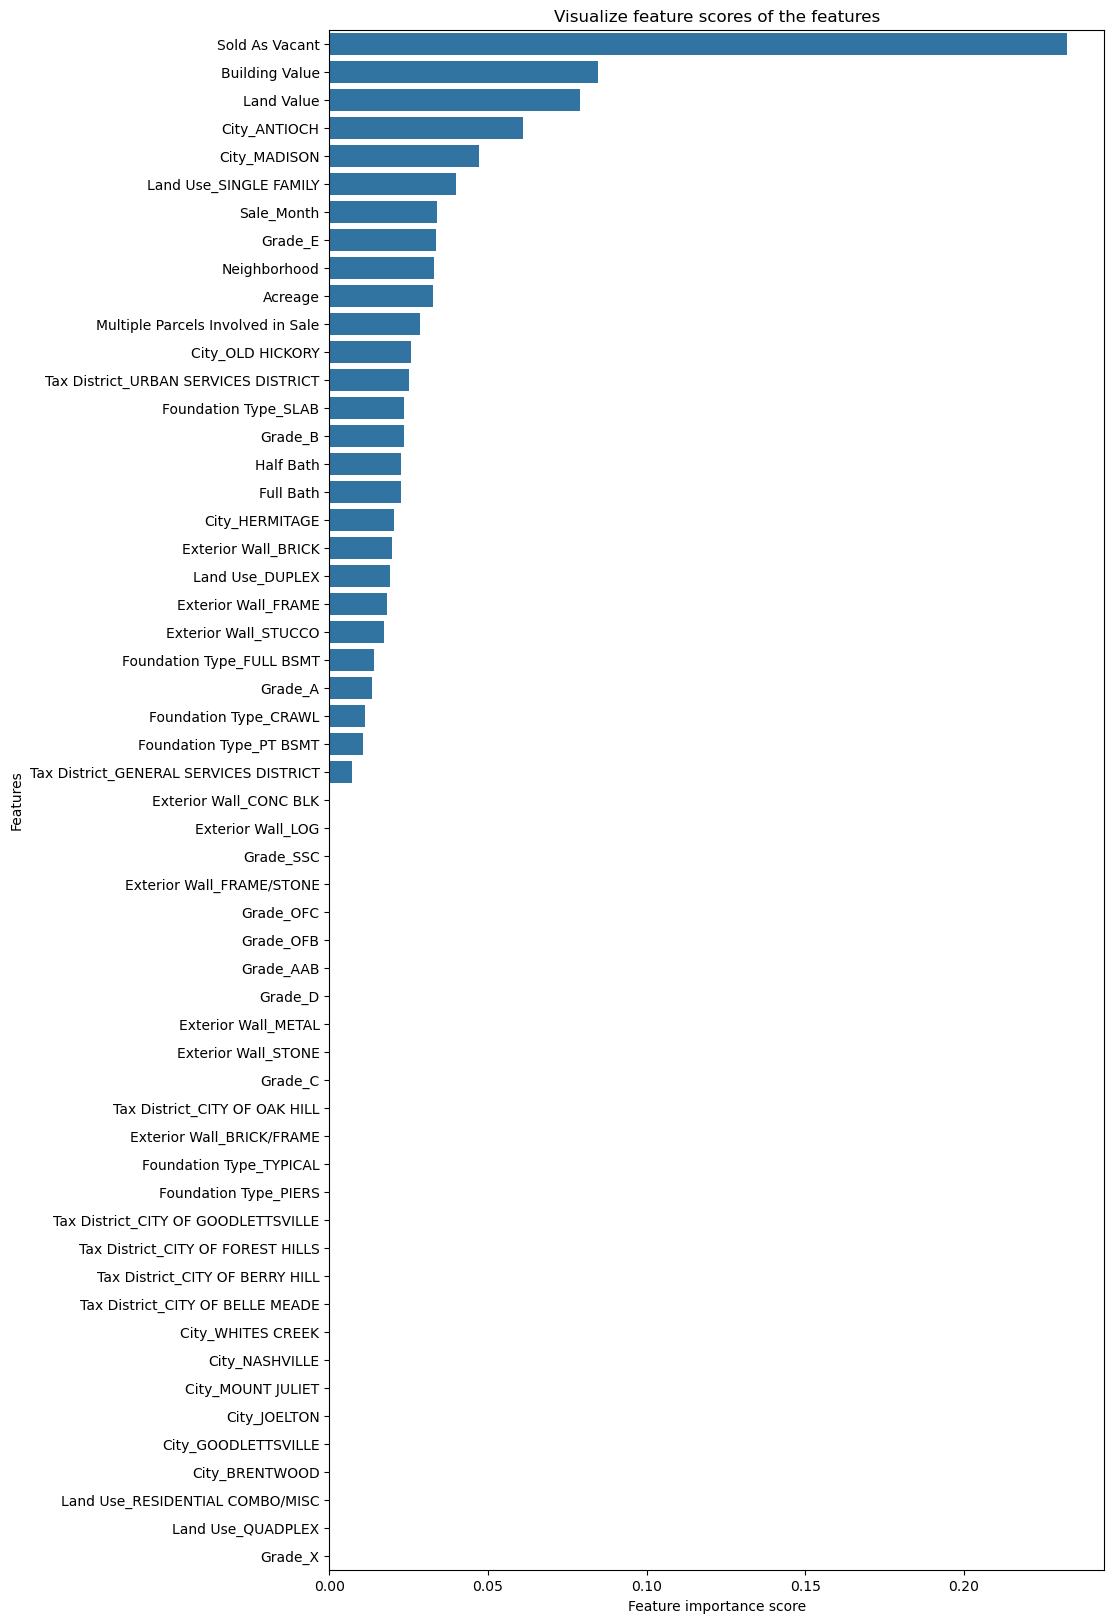

In [ ]:
feature_scores = pd.Series(clf_xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# print(feature_scores)

f, ax = plt.subplots(figsize=(10, 20))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

Accuracy of gbc: 75.25%
Precision of gbc: 15.03%
Recall of gbc: 49.85%


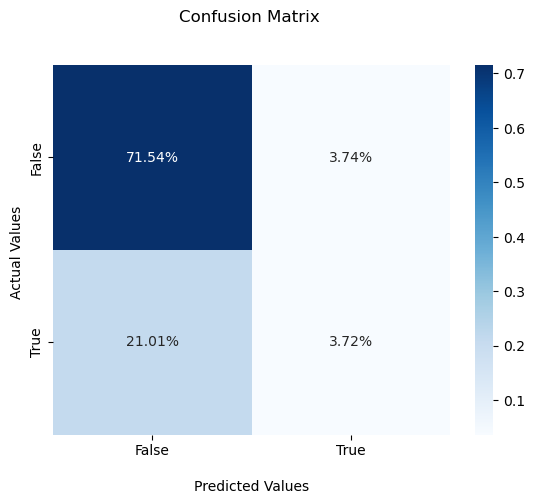

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42,max_depth=9)   
gb_model.fit(X_train,y_train)

y_predgbc = gb_model.predict(X_test)

print('Accuracy of gbc: '+str(round(accuracy_score(y_predgbc, y_test)*100,2))+'%')
print('Precision of gbc: '+str(round(precision_score(y_predgbc, y_test)*100,2))+'%')
print('Recall of gbc: '+str(round(recall_score(y_predgbc, y_test)*100,2))+'%')

#Confusion Matrix

cm = confusion_matrix(y_test, y_predgbc)
confusion_mat(cm)

/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_95188/2812706432.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(feature_scores.index)


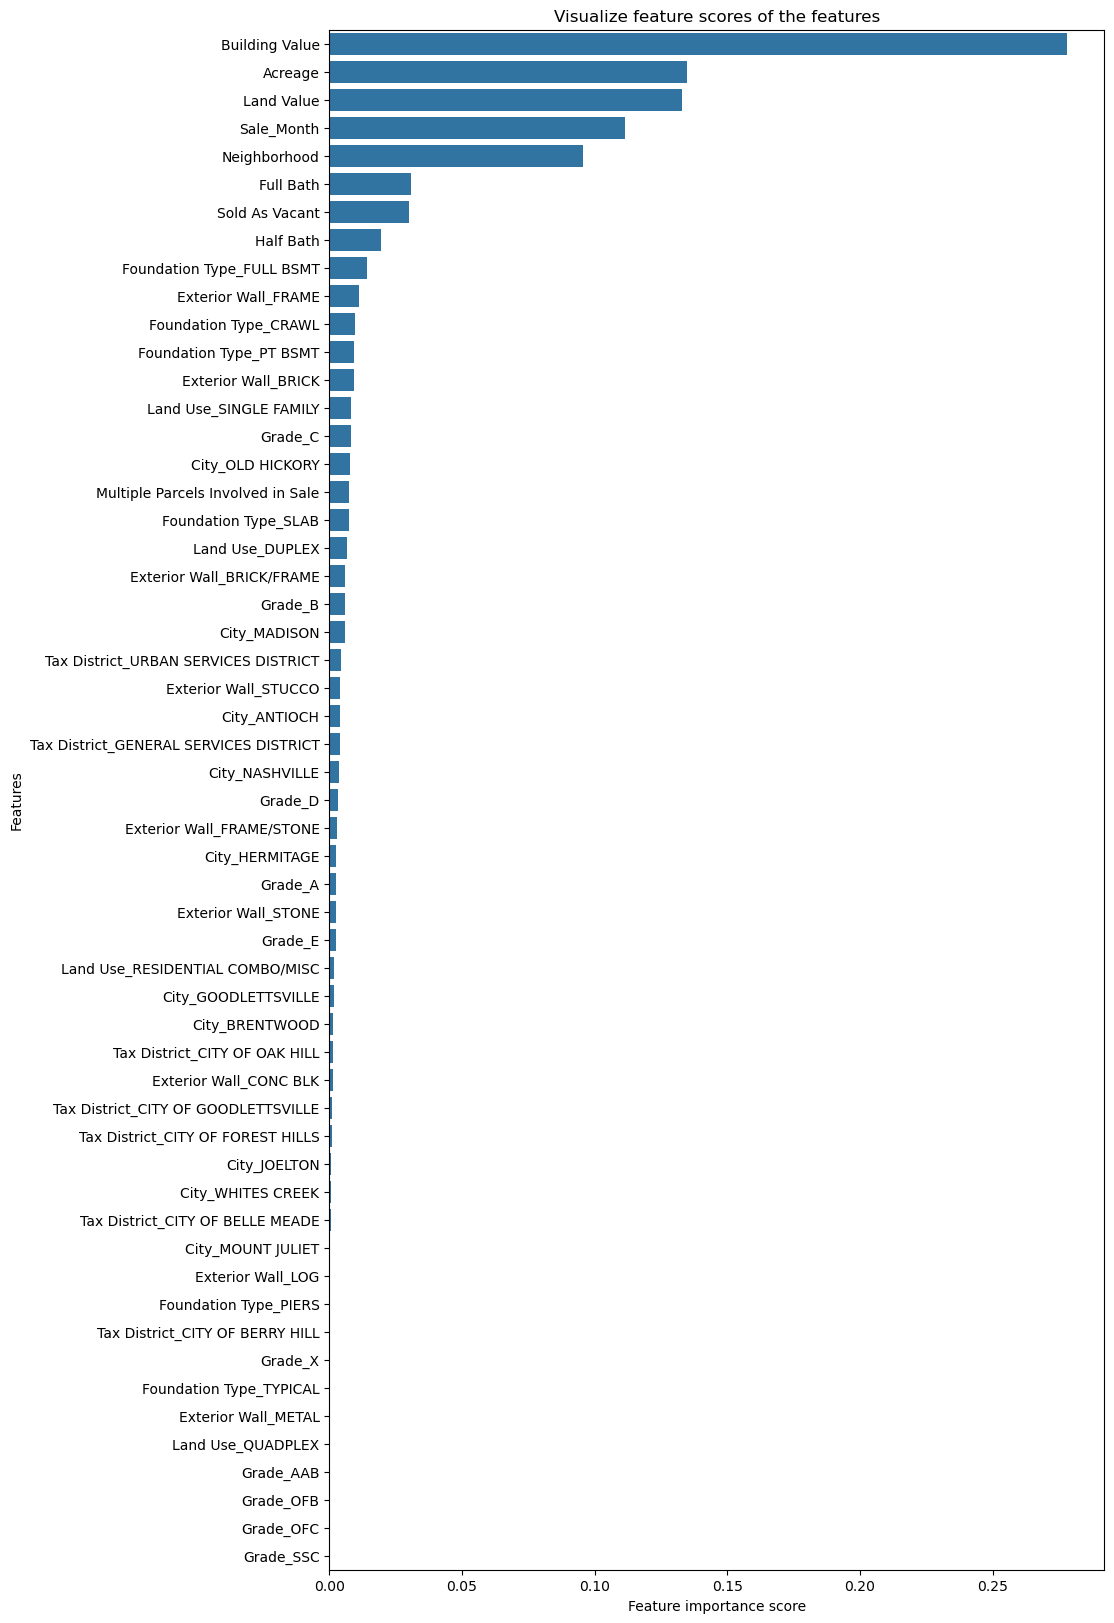

In [ ]:
feature_scores = pd.Series(gb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# print(feature_scores)

f, ax = plt.subplots(figsize=(10, 20))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming the models are already trained and the test sets are defined
models = {
    'Logistic Regression': logreg,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model
}

# Initialize dictionaries to store the results
accuracy_results = {}
precision_results = {}
recall_results = {}
f1_results = {}
confusion_matrices = {}

for name, model in models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Store the results
    accuracy_results[name] = accuracy
    precision_results[name] = precision
    recall_results[name] = recall
    f1_results[name] = f1
    confusion_matrices[name] = cm
    
    # Print the results
    print(f'{name} Results:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')
    print(f'Confusion Matrix:\n{cm}\n')

# Compare the models
print('Model Comparison:')
print('Accuracy:', accuracy_results)
print('Precision:', precision_results)
print('Recall:', recall_results)
print('F1-Score:', f1_results)


Logistic Regression Results:
Accuracy: 0.76
Precision: 0.68
Recall: 0.04
F1-Score: 0.07
Confusion Matrix:
[[3385   19]
 [1077   41]]

Decision Tree Results:
Accuracy: 0.76
Precision: 0.61
Recall: 0.05
F1-Score: 0.10
Confusion Matrix:
[[3366   38]
 [1059   59]]

Random Forest Results:
Accuracy: 0.75
Precision: 0.49
Recall: 0.16
F1-Score: 0.25
Confusion Matrix:
[[3215  189]
 [ 935  183]]

Gradient Boosting Results:
Accuracy: 0.75
Precision: 0.50
Recall: 0.15
F1-Score: 0.23
Confusion Matrix:
[[3235  169]
 [ 950  168]]

Model Comparison:
Accuracy: {'Logistic Regression': 0.7576293675364882, 'Decision Tree': 0.7574082264484742, 'Random Forest': 0.751437417072092, 'Gradient Boosting': 0.7525431225121627}
Precision: {'Logistic Regression': 0.6833333333333333, 'Decision Tree': 0.6082474226804123, 'Random Forest': 0.49193548387096775, 'Gradient Boosting': 0.49851632047477745}
Recall: {'Logistic Regression': 0.03667262969588551, 'Decision Tree': 0.052772808586762074, 'Random Forest': 0.163685152